<a href="https://colab.research.google.com/github/paulocarvalhoprcf/dataset-tcc/blob/main/arquivo1_TCC_2025_Univesp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.scielo.br/j/rep/a/PbxtzNVZvNwcVcRVfdJqkgj/

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import datetime

In [73]:
dados = pd.read_csv('dataset.csv')
dados

Data  BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA
0     07/01/1994   0.9625   446.20   386.95  17.57  148.400    3581  148.40
1     07/04/1994   0.9350   446.20   386.95  17.47  148.400    3623  148.40
2     07/05/1994   0.9250   446.40   386.05  17.38  148.400    3581  148.40
3     07/06/1994   0.9100   446.10   383.95  17.06  148.400    3564  148.40
4     07/07/1994   0.9080   448.40   384.65  17.08  148.400    3754  148.40
...          ...      ...      ...      ...    ...      ...     ...     ...
7946  12/25/2024   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22
7947  12/26/2024   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22
7948  12/27/2024   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22
7949  12/30/2024   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22
7950  12/31/2024   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22

[7951 rows x 8 columns]

In [74]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     7951 non-null   object 
 1   BRL/USD  7951 non-null   float64
 2   S&P500   7951 non-null   float64
 3   XAU/USD  7951 non-null   float64
 4   Crude    7951 non-null   float64
 5   CPI      7951 non-null   float64
 6   IBOV     7951 non-null   int64  
 7   IPCA     7951 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 497.1+ KB


In [75]:
dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7951 entries, 1994-07-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  7951 non-null   float64
 1   S&P500   7951 non-null   float64
 2   XAU/USD  7951 non-null   float64
 3   Crude    7951 non-null   float64
 4   CPI      7951 non-null   float64
 5   IBOV     7951 non-null   int64  
 6   IPCA     7951 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 496.9 KB


In [76]:
dados

BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA
Data                                                                 
1994-07-01   0.9625   446.20   386.95  17.57  148.400    3581  148.40
1994-07-04   0.9350   446.20   386.95  17.47  148.400    3623  148.40
1994-07-05   0.9250   446.40   386.05  17.38  148.400    3581  148.40
1994-07-06   0.9100   446.10   383.95  17.06  148.400    3564  148.40
1994-07-07   0.9080   448.40   384.65  17.08  148.400    3754  148.40
...             ...      ...      ...    ...      ...     ...     ...
2024-12-25   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22
2024-12-26   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22
2024-12-27   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22
2024-12-30   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22
2024-12-31   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22

[7951 rows x 7 columns]

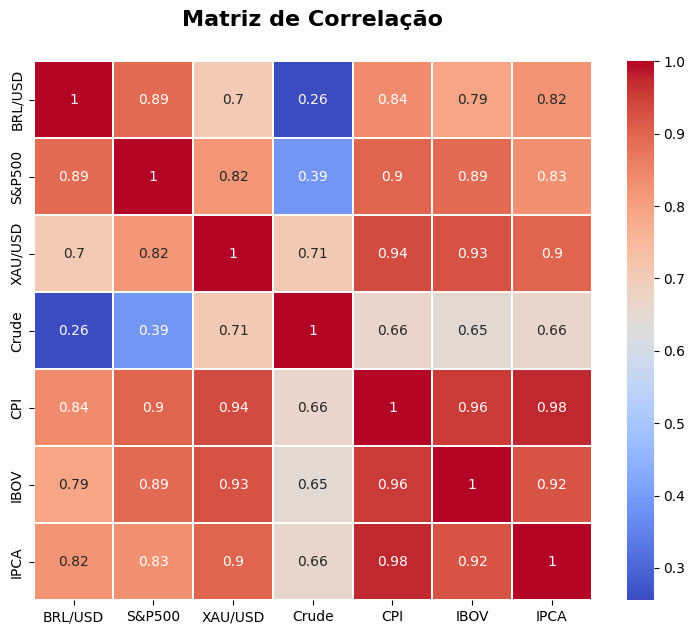

In [77]:
sns.heatmap(dados.corr(), annot=True, linewidths=0.1, linecolor='white', cmap='coolwarm')
plt.title('Matriz de Correlação', fontsize=16, weight='bold', y=1.05)
plt.savefig('corr_matrix.png')
plt.show()

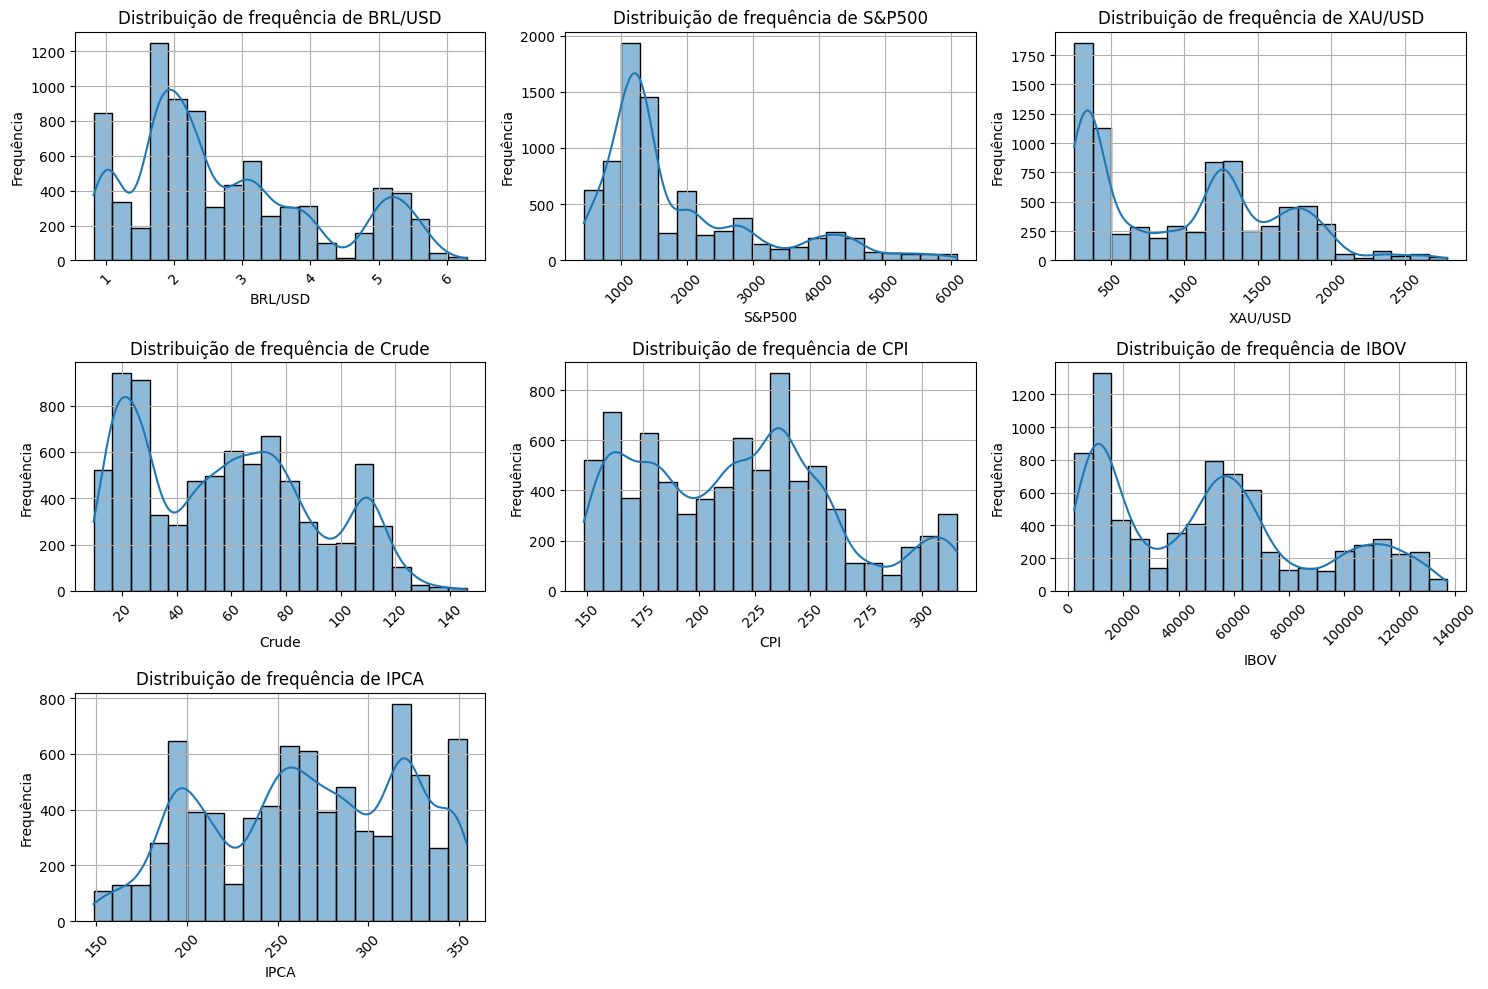

In [78]:
plt.figure(figsize=(15, 10))
features_data = ['BRL/USD', 'S&P500', 'XAU/USD', 'Crude', 'CPI', 'IBOV', 'IPCA']
for i, col in enumerate(features_data):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dados[col], bins=20, edgecolor='black', kde=True)
    plt.title(f'Distribuição de frequência de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.grid()
plt.tight_layout()
plt.savefig('histogramas_dados.png')
plt.show()

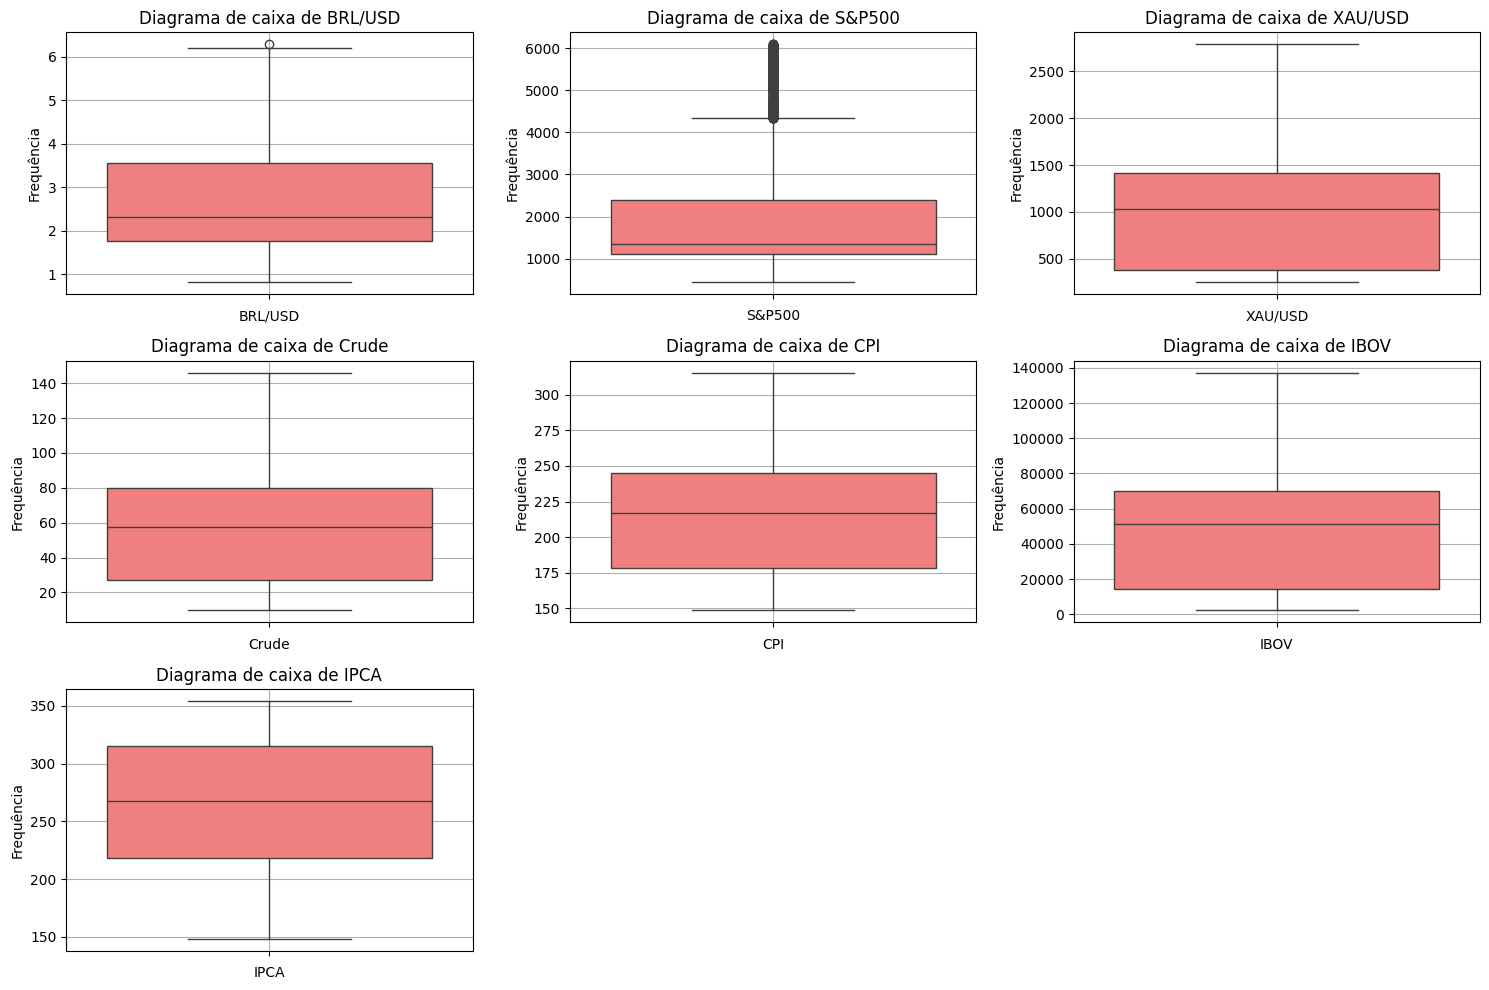

In [79]:
plt.figure(figsize=(15, 10))
features_data = ['BRL/USD', 'S&P500', 'XAU/USD', 'Crude', 'CPI', 'IBOV', 'IPCA']
for i, col in enumerate(features_data):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(dados[col], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Diagrama de caixa de {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Frequência')
    plt.grid()
plt.tight_layout()
plt.savefig('boxplots_dados.png')
plt.show()

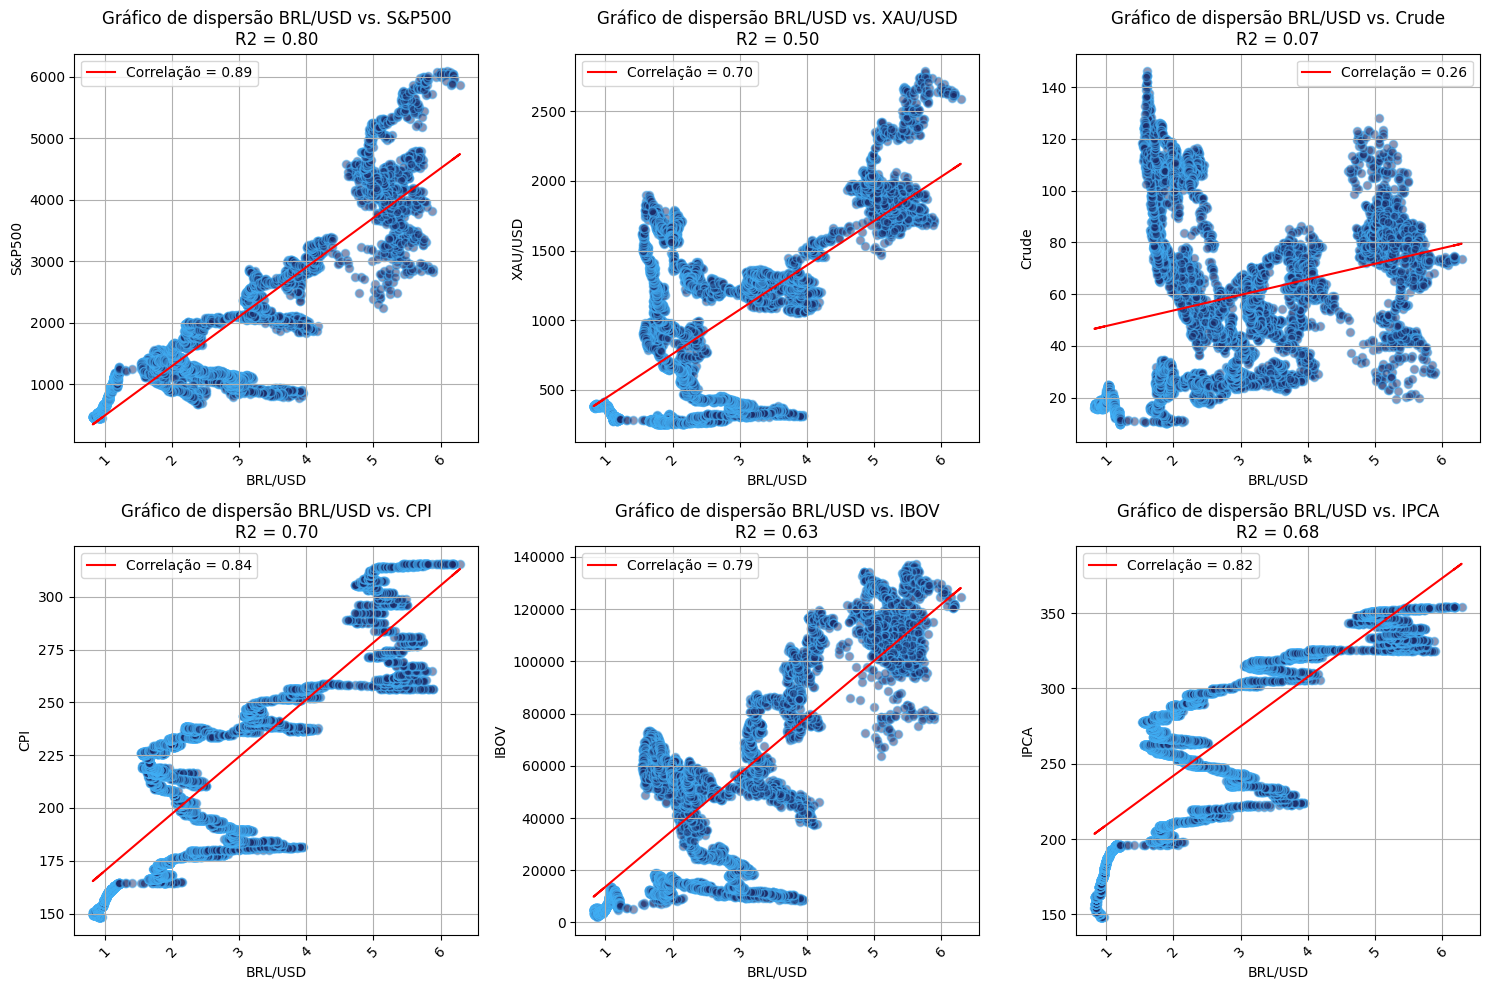

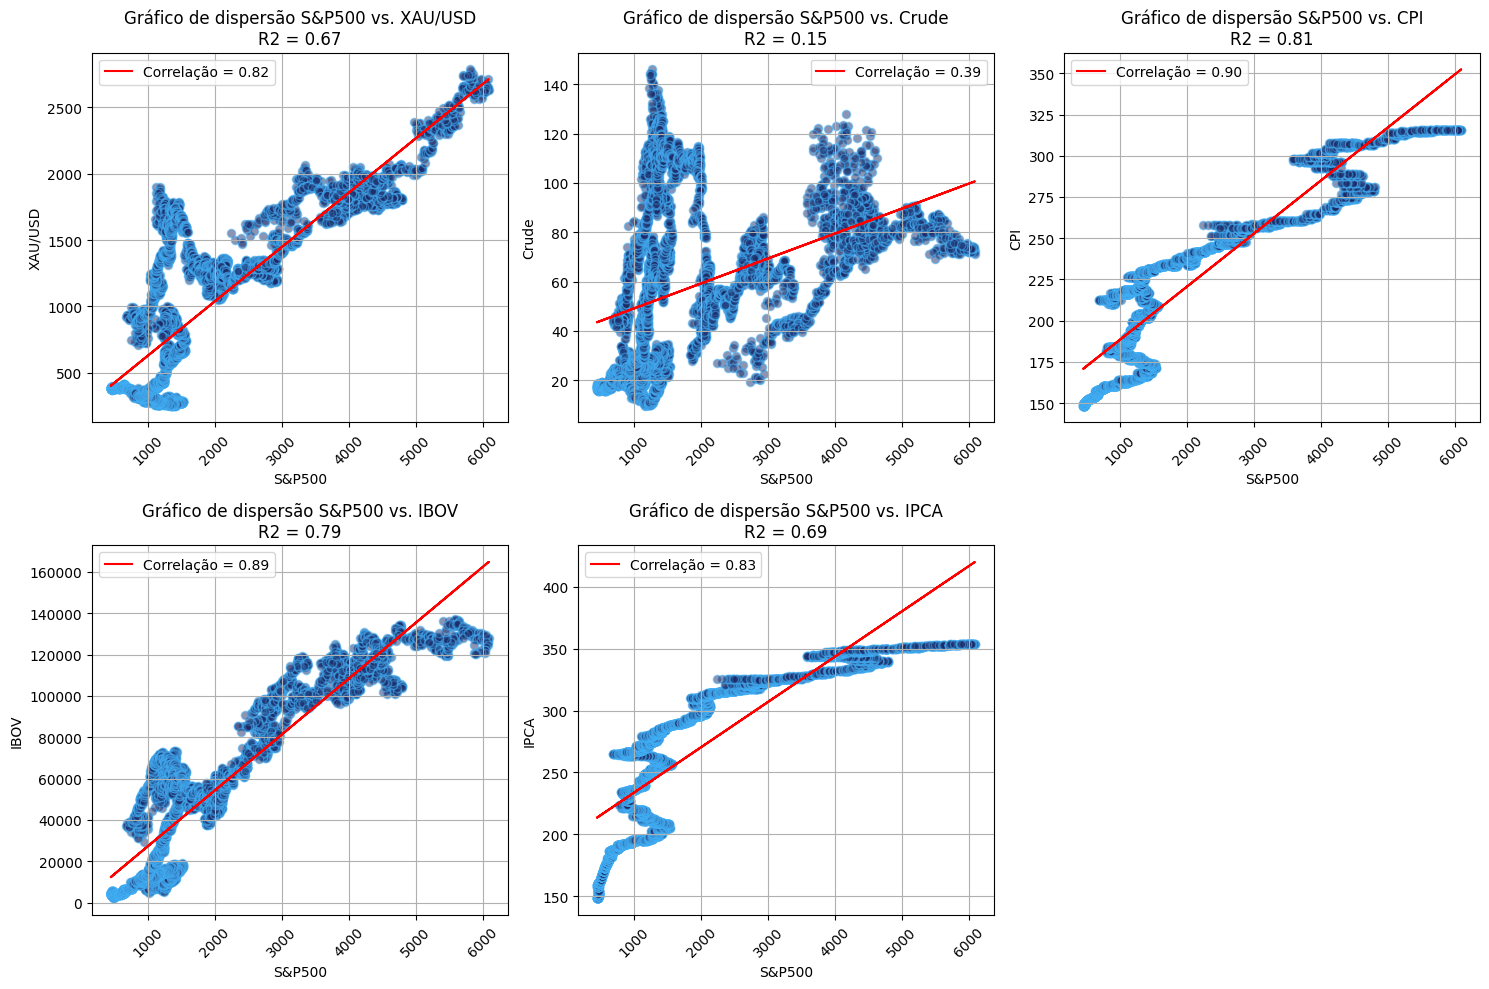

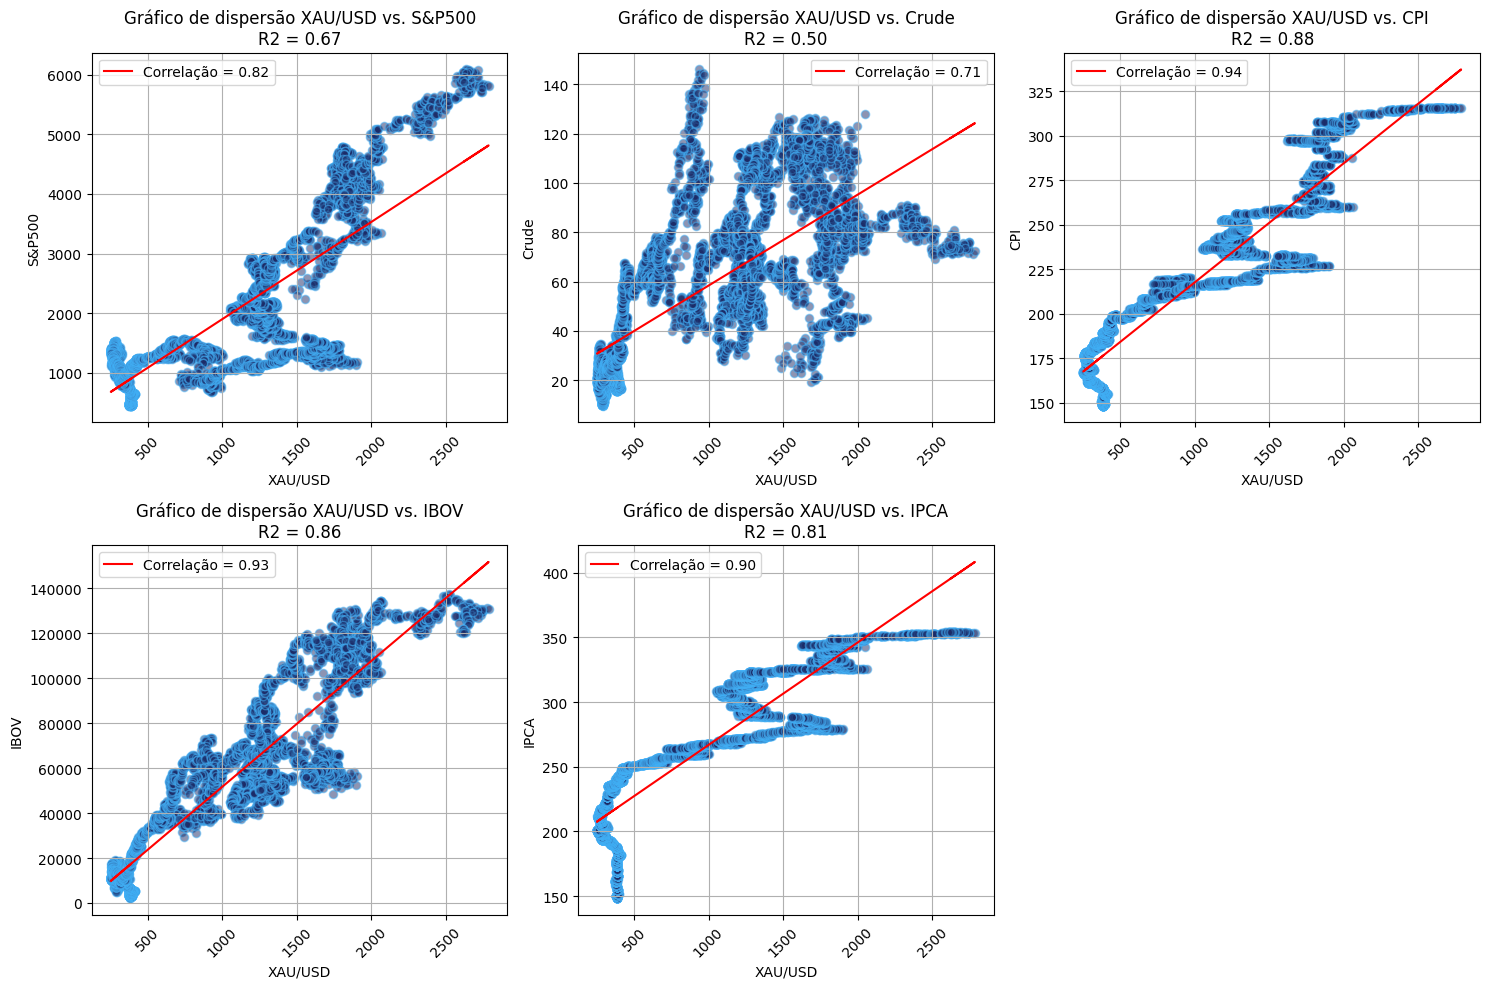

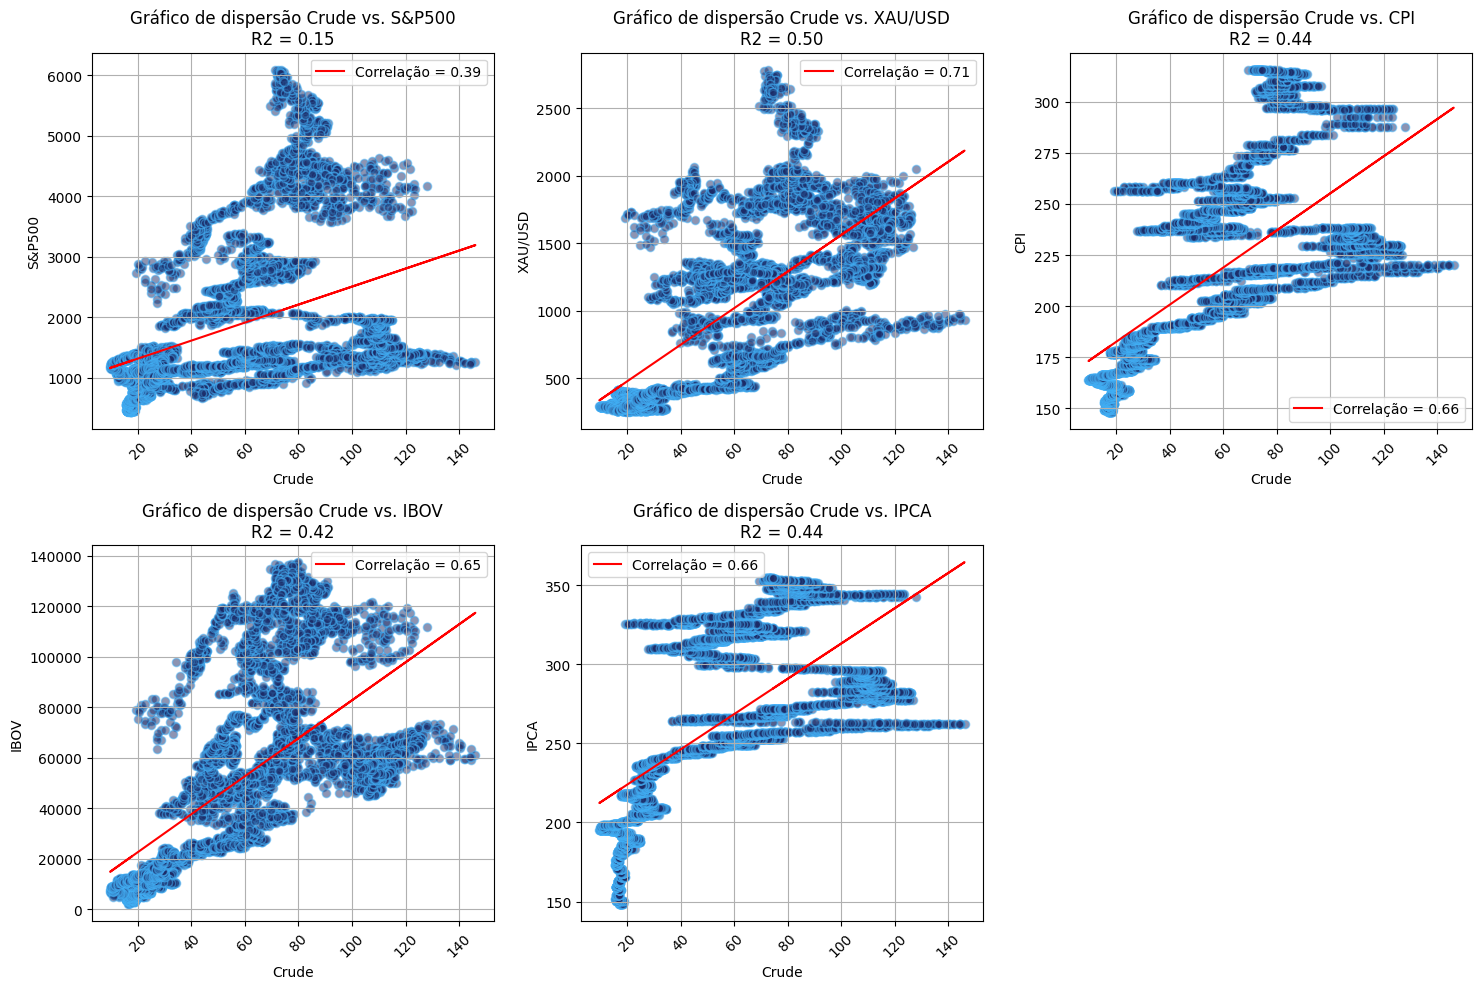

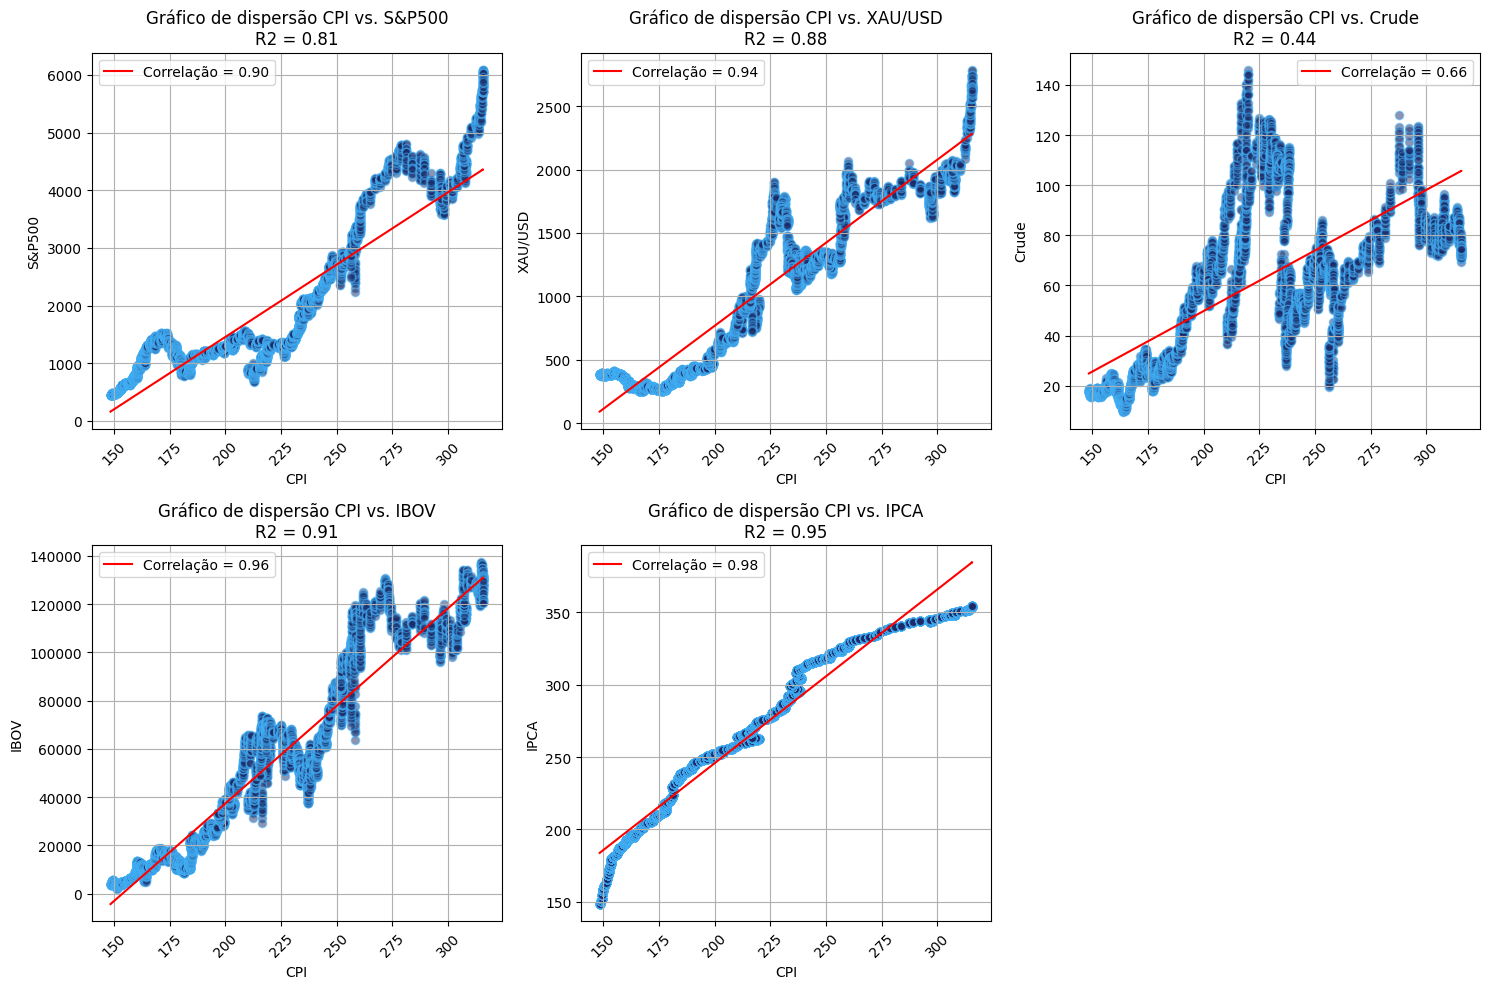

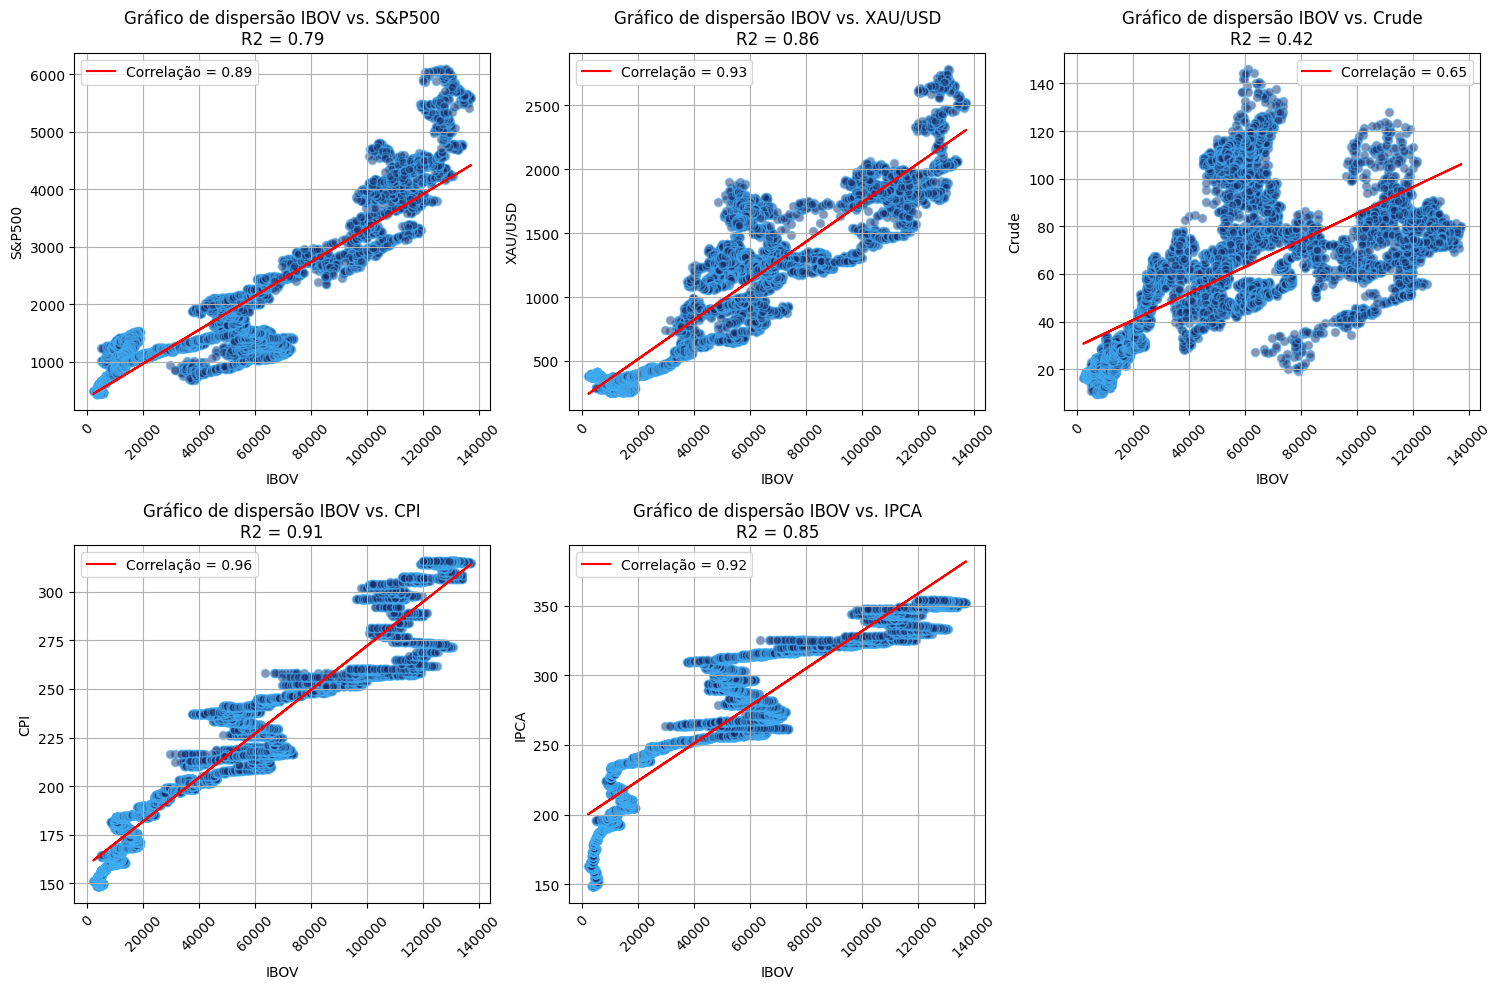

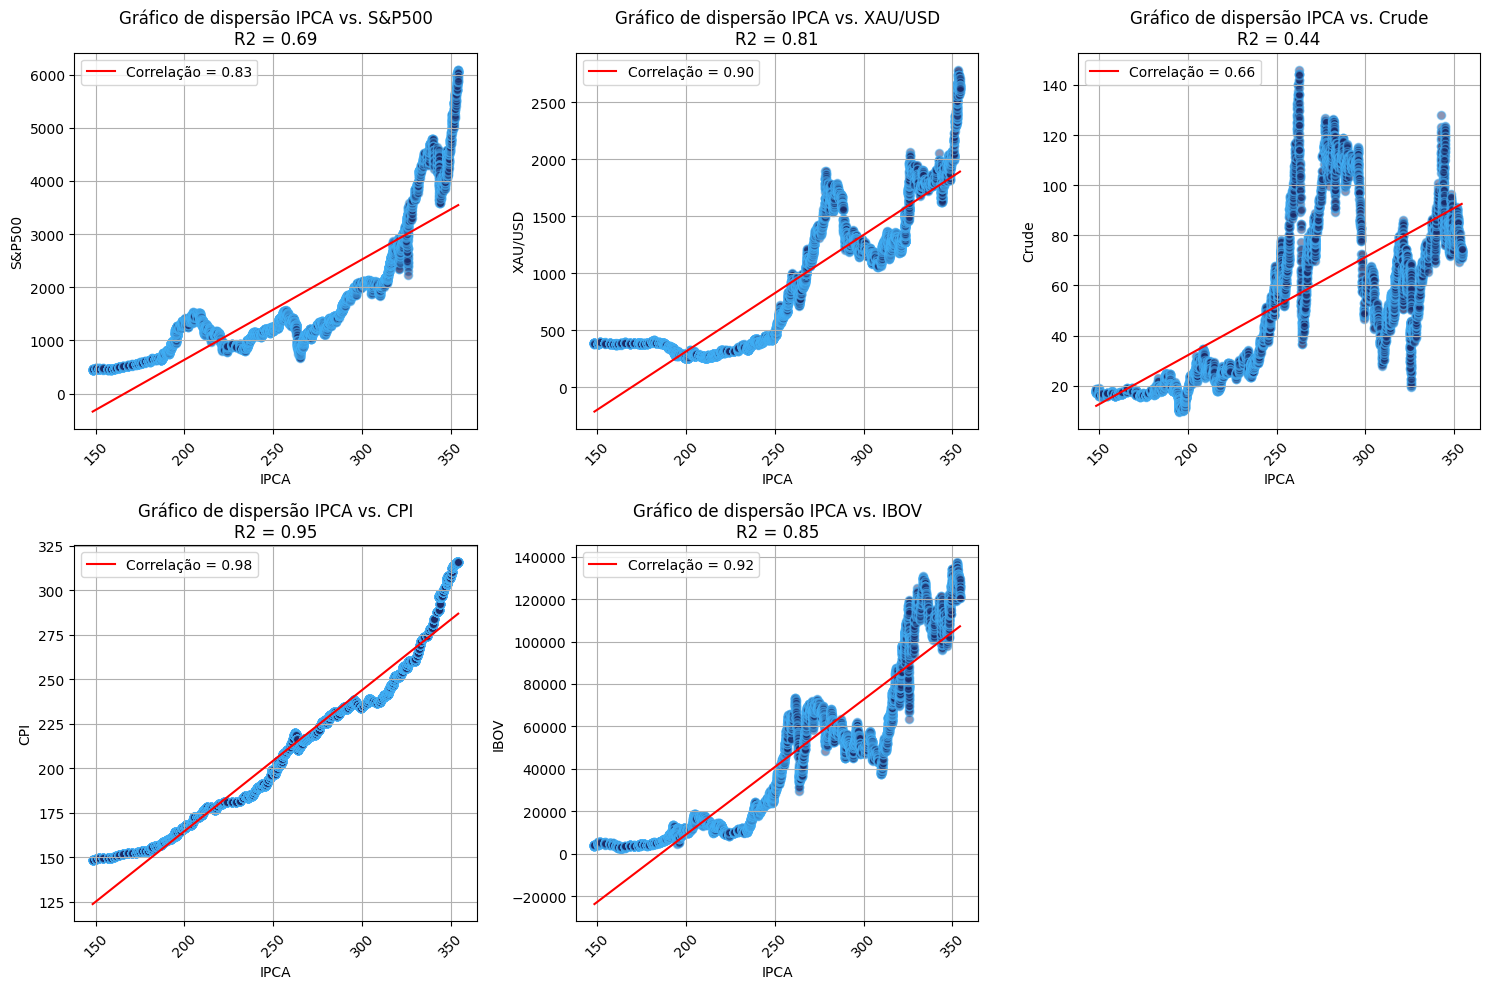

In [80]:
features_data = ['BRL/USD', 'S&P500', 'XAU/USD', 'Crude', 'CPI', 'IBOV', 'IPCA']

for outer_index, i in enumerate(features_data):
  plt.figure(figsize=(15, 10))
  plot_index = 1
  for inner_index, j in enumerate(['S&P500', 'XAU/USD', 'Crude', 'CPI', 'IBOV', 'IPCA']):
      if i != j:
        x = dados[features_data[outer_index]].values.reshape(-1, 1)
        y = dados[j].values.reshape(-1, 1)

        regr = LinearRegression()
        regr.fit(x, y)
        y_pred = regr.predict(x)

        correlation = np.corrcoef(x.ravel(), y.ravel())[0, 1]
        r2 = r2_score(y, y_pred)


        plt.subplot(2, 3, plot_index)
        plt.scatter(dados[i], dados[j], color='#1C2B67', edgecolor='#44b2f8', alpha=0.5)
        plt.plot(dados[i], y_pred, color='red', label=f'Correlação = {correlation:.2f}', linewidth=1.5)

        plt.xlabel(f'{i}')
        plt.xticks(rotation=45)
        plt.ylabel(f'{j}')
        plt.title(f'Gráfico de dispersão {i} vs. {j}\nR2 = {r2:.2f}')
        plt.legend()
        plt.grid()
        plt.subplots_adjust(wspace=0.3, hspace=0.3)

        plot_index += 1 # Incrementa o contador apenas se o gráfico for gerado

  plt.tight_layout()

  plt.savefig(f'scatterplots_{i.replace("/", "_")}.png')
plt.show()

In [81]:
scaler = MinMaxScaler()
dados['dol_IBOV'] = dados['IBOV']/dados['BRL/USD']
dados['scaled_S&P500'] = scaler.fit_transform(dados[['S&P500']])
dados['scaled_dol_IBOV'] = scaler.fit_transform(dados[['dol_IBOV']])
dados['scaled_CPI'] = scaler.fit_transform(dados[['CPI']])
dados['scaled_IPCA'] = scaler.fit_transform(dados[['IPCA']])
dados

BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA  \
Data                                                                    
1994-07-01   0.9625   446.20   386.95  17.57  148.400    3581  148.40   
1994-07-04   0.9350   446.20   386.95  17.47  148.400    3623  148.40   
1994-07-05   0.9250   446.40   386.05  17.38  148.400    3581  148.40   
1994-07-06   0.9100   446.10   383.95  17.06  148.400    3564  148.40   
1994-07-07   0.9080   448.40   384.65  17.08  148.400    3754  148.40   
...             ...      ...      ...    ...      ...     ...     ...   
2024-12-25   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22   
2024-12-26   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22   
2024-12-27   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22   
2024-12-30   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22   
2024-12-31   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22   

                dol_IBOV  scaled_S&P500  scaled_dol_IBOV  scaled_CPI  \
Data                                                                   
1994-07-01   3720.519481       0.000142         0.036853    0.000000   
1994-07-04   3874.866310       0.000142         0.040482    0.000000   
1994-07-05   3871.351351       0.000177         0.040399    0.000000   
1994-07-06   3916.483516       0.000124         0.041460    0.000000   
1994-07-07   4134.361233       0.000531         0.046583    0.000000   
...                  ...            ...              ...         ...   
2024-12-25  19724.259361       0.991102         0.413122    0.999647   
2024-12-26  19532.735977       0.990668         0.408619    0.999647   
2024-12-27  19540.055516       0.978843         0.408791    0.999647   
2024-12-30  19467.609829       0.967523         0.407088    0.999647   
2024-12-31  19467.609829       0.963039         0.407088    0.999647   

            scaled_IPCA  
Data                     
1994-07-01          0.0  
1994-07-04          0.0  
1994-07-05          0.0  
1994-07-06          0.0  
1994-07-07          0.0  
...                 ...  
2024-12-25          1.0  
2024-12-26          1.0  
2024-12-27          1.0  
2024-12-30          1.0  
2024-12-31          1.0  

[7951 rows x 12 columns]

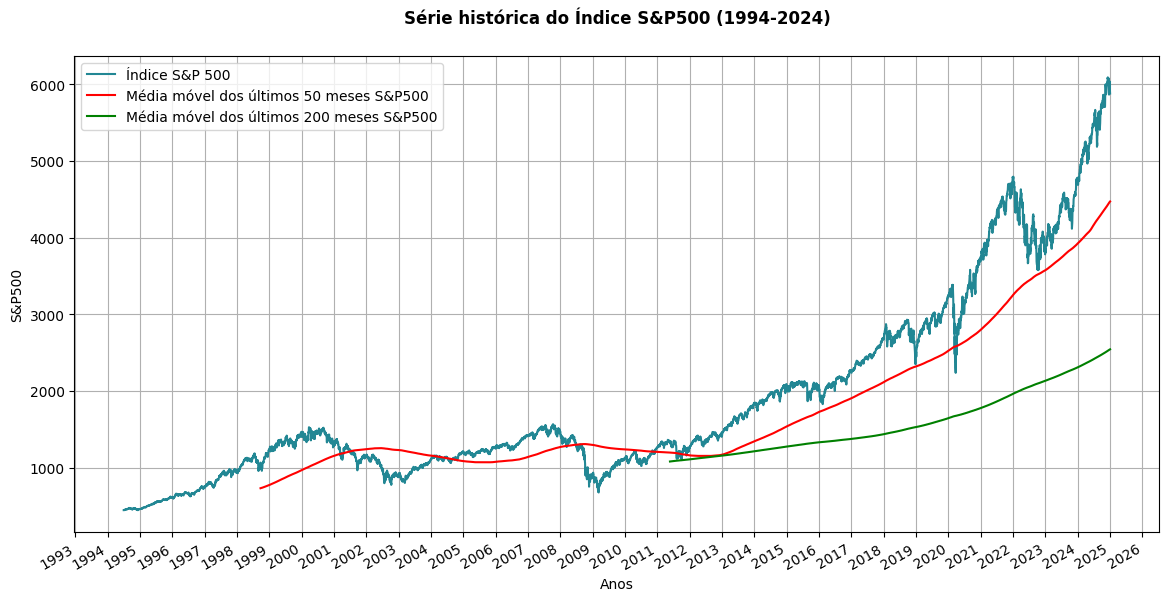

In [82]:
dados['MA50_S&P500'] = dados['S&P500'].rolling(window=1100).mean()
dados['MA200_S&P500'] = dados['S&P500'].rolling(window=4400).mean()

plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['S&P500'], label='Índice S&P 500', color='#228794')
plt.plot(dados.index, dados['MA50_S&P500'], label='Média móvel dos últimos 50 meses S&P500', color='red')
plt.plot(dados.index, dados['MA200_S&P500'], label='Média móvel dos últimos 200 meses S&P500', color='green')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica do Índice S&P500 (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('S&P500')
plt.legend()
plt.grid(True)
plt.savefig('s&p500.png')
plt.show()

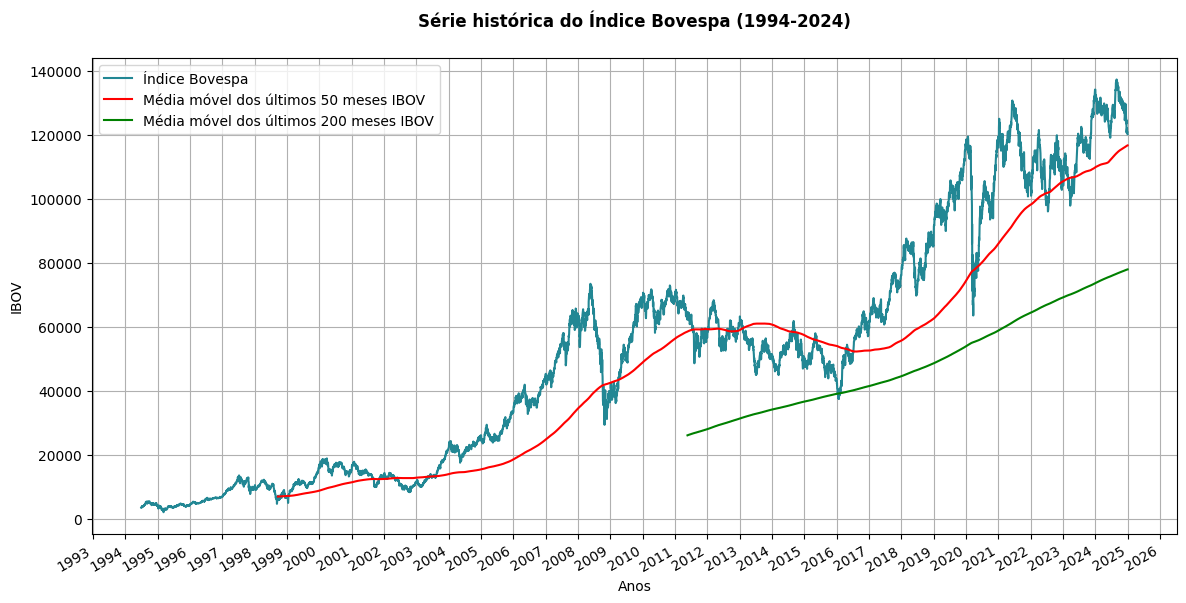

In [83]:
dados['MA50_IBOV'] = dados['IBOV'].rolling(window=1100).mean()
dados['MA200_IBOV'] = dados['IBOV'].rolling(window=4400).mean()

plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['IBOV'], label='Índice Bovespa', color='#228794')
plt.plot(dados.index, dados['MA50_IBOV'], label='Média móvel dos últimos 50 meses IBOV', color='red')
plt.plot(dados.index, dados['MA200_IBOV'], label='Média móvel dos últimos 200 meses IBOV', color='green')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica do Índice Bovespa (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('IBOV')
plt.legend()
plt.grid(True)
plt.savefig('ibov.png')
plt.show()

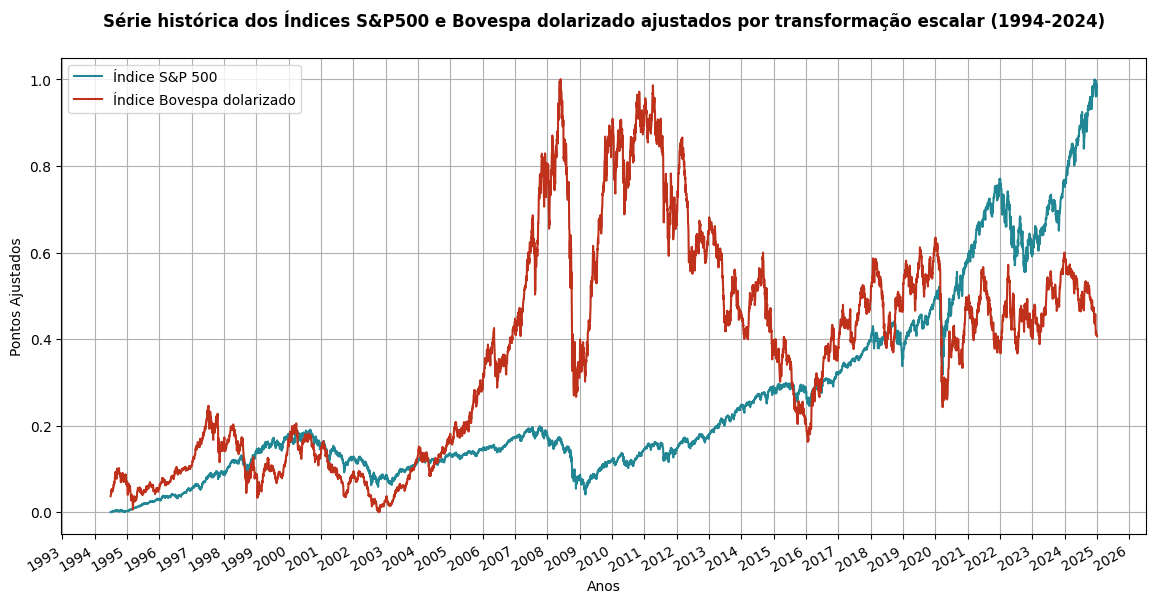

In [84]:
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['scaled_S&P500'], label='Índice S&P 500', color='#228794')
plt.plot(dados.index, dados['scaled_dol_IBOV'], label='Índice Bovespa dolarizado', color='#bf311b')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica dos Índices S&P500 e Bovespa dolarizado ajustados por transformação escalar (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('Pontos Ajustados')
plt.legend()
plt.grid(True)
plt.savefig('s&p500_ibov.png')
plt.show()

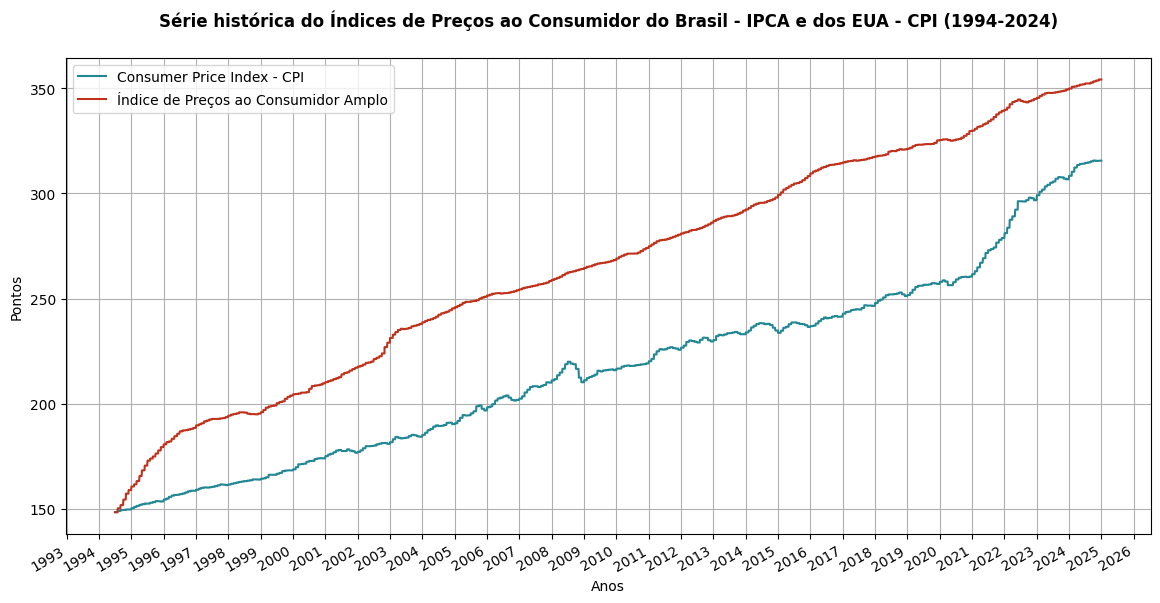

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['CPI'], label='Consumer Price Index - CPI', color='#228794')
plt.plot(dados.index, dados['IPCA'], label='Índice de Preços ao Consumidor Amplo', color='#bf311b')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica do Índices de Preços ao Consumidor do Brasil - IPCA e dos EUA - CPI (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True)
plt.savefig('cpi_ipca.png')
plt.show()

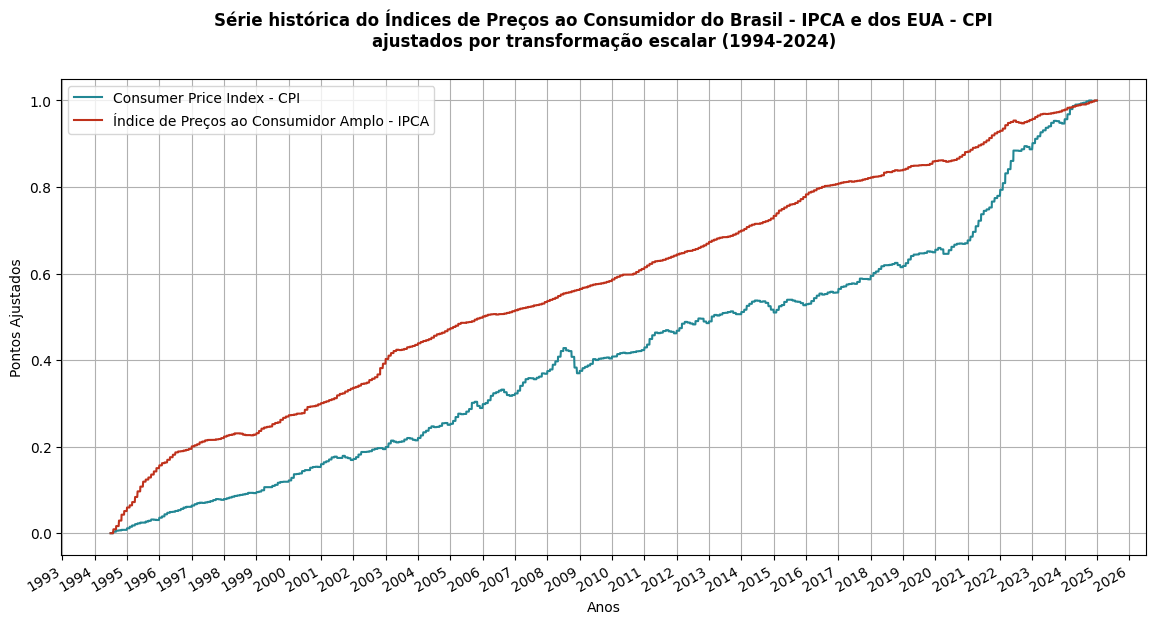

In [86]:
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['scaled_CPI'], label='Consumer Price Index - CPI', color='#228794')
plt.plot(dados.index, dados['scaled_IPCA'], label='Índice de Preços ao Consumidor Amplo - IPCA', color='#bf311b')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica do Índices de Preços ao Consumidor do Brasil - IPCA e dos EUA - CPI\najustados por transformação escalar (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('Pontos Ajustados')
plt.legend()
plt.grid(True)
plt.savefig('scaled_cpi_ipca.png')
plt.show()

In [87]:
dados2 = pd.read_csv('dataset2.csv')
dados2

Data  BRL/USD  EFFR  SELIC
0     07/03/2000   1.8130  7.03  17.26
1     07/04/2000   1.8080  7.03  17.22
2     07/05/2000   1.8020  6.52  17.23
3     07/06/2000   1.8000  6.51  17.28
4     07/07/2000   1.7990  6.42  17.28
...          ...      ...   ...    ...
6385  12/25/2024   6.1906  4.33  12.15
6386  12/26/2024   6.1828  4.33  12.15
6387  12/27/2024   6.1964  4.33  12.15
6388  12/30/2024   6.1778  4.33  12.15
6389  12/31/2024   6.1778  4.33  12.15

[6390 rows x 4 columns]

In [88]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     6390 non-null   object 
 1   BRL/USD  6390 non-null   float64
 2   EFFR     6390 non-null   float64
 3   SELIC    6390 non-null   float64
dtypes: float64(3), object(1)
memory usage: 199.8+ KB


In [89]:
dados2['Data'] = pd.to_datetime(dados2['Data'])
dados2.set_index('Data', inplace=True)
dados2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  6390 non-null   float64
 1   EFFR     6390 non-null   float64
 2   SELIC    6390 non-null   float64
dtypes: float64(3)
memory usage: 199.7 KB


In [90]:
dados2

BRL/USD  EFFR  SELIC
Data                            
2000-07-03   1.8130  7.03  17.26
2000-07-04   1.8080  7.03  17.22
2000-07-05   1.8020  6.52  17.23
2000-07-06   1.8000  6.51  17.28
2000-07-07   1.7990  6.42  17.28
...             ...   ...    ...
2024-12-25   6.1906  4.33  12.15
2024-12-26   6.1828  4.33  12.15
2024-12-27   6.1964  4.33  12.15
2024-12-30   6.1778  4.33  12.15
2024-12-31   6.1778  4.33  12.15

[6390 rows x 3 columns]

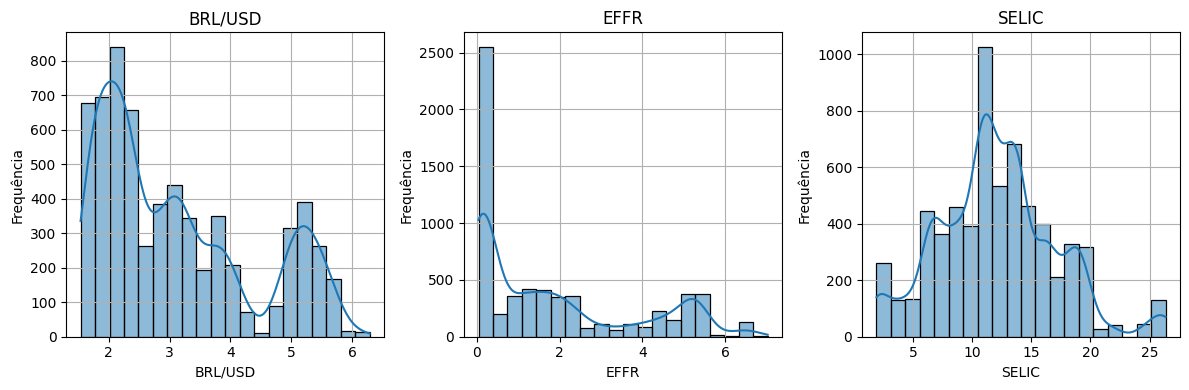

In [91]:
plt.figure(figsize=(12, 4))
features_dados2 = ['BRL/USD', 'EFFR', 'SELIC']
for i, col in enumerate(features_dados2):
    plt.subplot(1, 3, i + 1)
    sns.histplot(dados2[col], bins=20, edgecolor='black', kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid()
plt.tight_layout()
plt.savefig('histogramas_dados2.png')
plt.show()

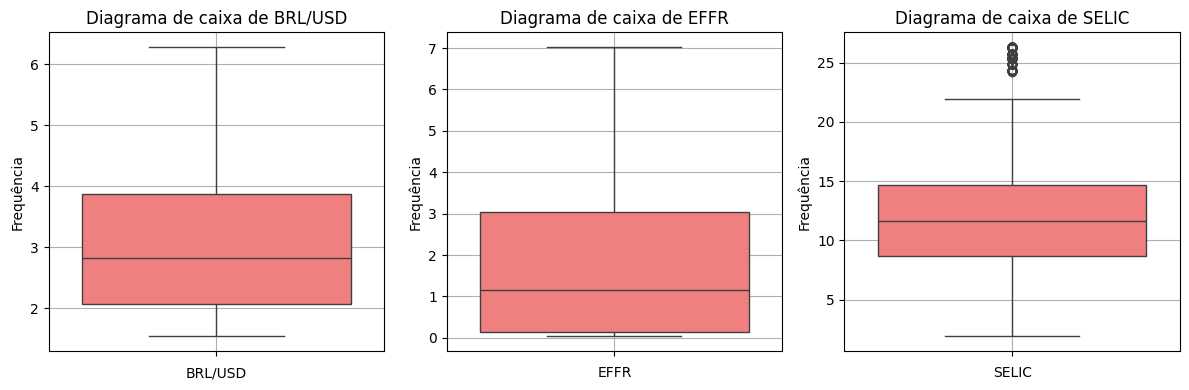

In [92]:
plt.figure(figsize=(12, 4))
features_data = ['BRL/USD', 'EFFR', 'SELIC']
for i, col in enumerate(features_data):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(dados2[col], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Diagrama de caixa de {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Frequência')
    plt.grid()
plt.tight_layout()
plt.savefig('boxplots_dados2.png')
plt.show()

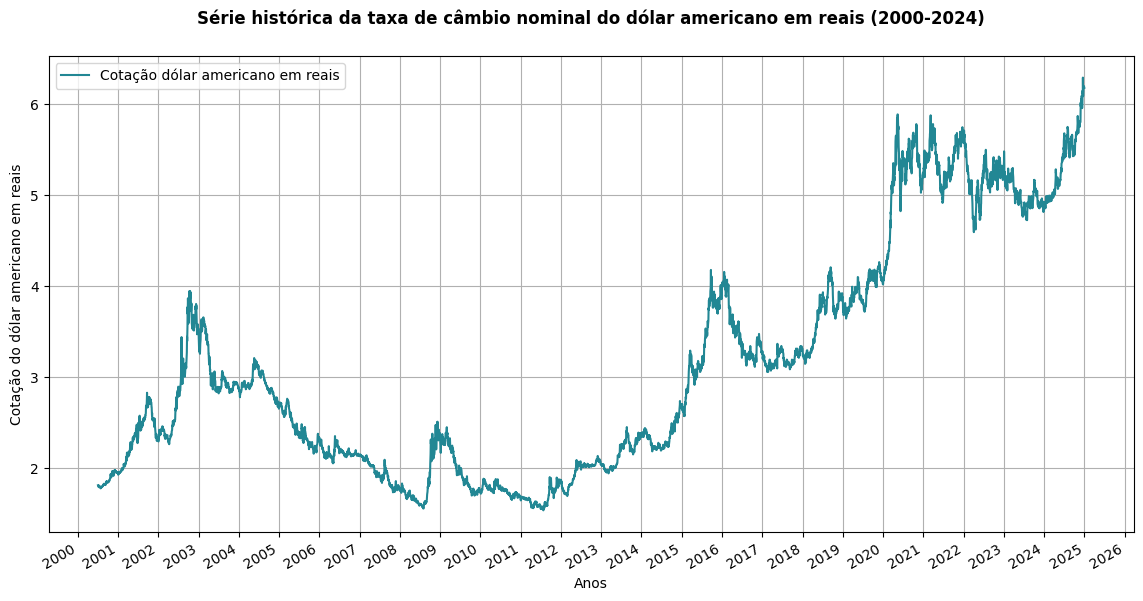

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(dados2.index, dados2['BRL/USD'], label='Cotação dólar americano em reais', color='#228794')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica da taxa de câmbio nominal do dólar americano em reais (2000-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('Cotação do dólar americano em reais')
plt.legend()
plt.grid(True)
plt.savefig('hist_dolar.png')
plt.show()

In [94]:
dados2['scaled_EFFR'] = scaler.fit_transform(dados2[['EFFR']])
dados2['scaled_SELIC'] = scaler.fit_transform(dados2[['SELIC']])
dados2

BRL/USD  EFFR  SELIC  scaled_EFFR  scaled_SELIC
Data                                                       
2000-07-03   1.8130  7.03  17.26     1.000000      0.628221
2000-07-04   1.8080  7.03  17.22     1.000000      0.626585
2000-07-05   1.8020  6.52  17.23     0.927039      0.626994
2000-07-06   1.8000  6.51  17.28     0.925608      0.629039
2000-07-07   1.7990  6.42  17.28     0.912732      0.629039
...             ...   ...    ...          ...           ...
2024-12-25   6.1906  4.33  12.15     0.613734      0.419223
2024-12-26   6.1828  4.33  12.15     0.613734      0.419223
2024-12-27   6.1964  4.33  12.15     0.613734      0.419223
2024-12-30   6.1778  4.33  12.15     0.613734      0.419223
2024-12-31   6.1778  4.33  12.15     0.613734      0.419223

[6390 rows x 5 columns]

In [95]:
dados2['SELIC-EFFR'] = dados2['SELIC'] - dados2['EFFR']
dados2

BRL/USD  EFFR  SELIC  scaled_EFFR  scaled_SELIC  SELIC-EFFR
Data                                                                   
2000-07-03   1.8130  7.03  17.26     1.000000      0.628221       10.23
2000-07-04   1.8080  7.03  17.22     1.000000      0.626585       10.19
2000-07-05   1.8020  6.52  17.23     0.927039      0.626994       10.71
2000-07-06   1.8000  6.51  17.28     0.925608      0.629039       10.77
2000-07-07   1.7990  6.42  17.28     0.912732      0.629039       10.86
...             ...   ...    ...          ...           ...         ...
2024-12-25   6.1906  4.33  12.15     0.613734      0.419223        7.82
2024-12-26   6.1828  4.33  12.15     0.613734      0.419223        7.82
2024-12-27   6.1964  4.33  12.15     0.613734      0.419223        7.82
2024-12-30   6.1778  4.33  12.15     0.613734      0.419223        7.82
2024-12-31   6.1778  4.33  12.15     0.613734      0.419223        7.82

[6390 rows x 6 columns]

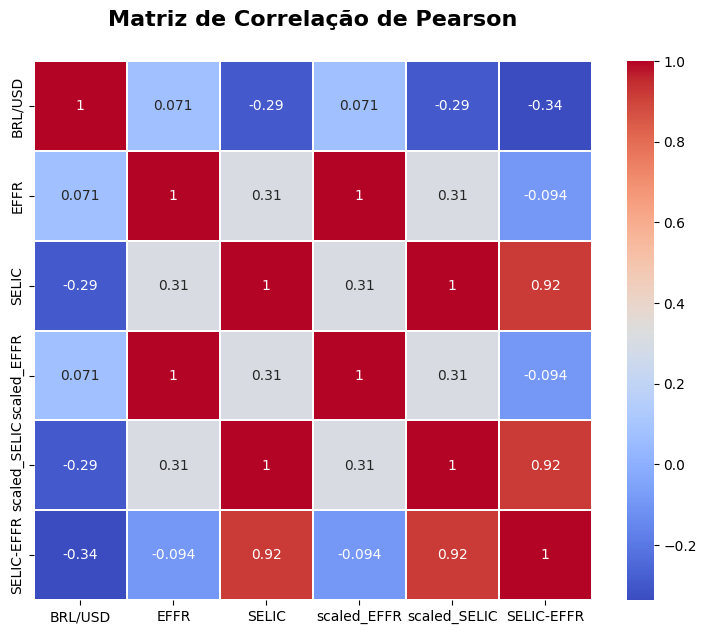

In [96]:
sns.heatmap(dados2.corr(method = 'pearson'), annot=True, linewidths=0.1, linecolor='white', cmap='coolwarm')
plt.title('Matriz de Correlação de Pearson', fontsize=16, weight='bold', y=1.05)
plt.savefig('corr_matrix2_pearson.png')
plt.show()

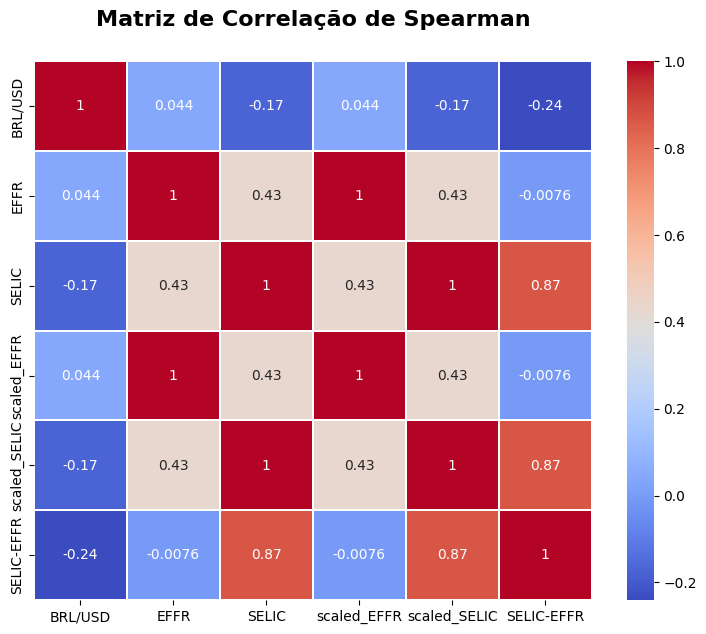

In [97]:
sns.heatmap(dados2.corr(method = 'spearman'), annot=True, linewidths=0.1, linecolor='white', cmap='coolwarm')
plt.title('Matriz de Correlação de Spearman', fontsize=16, weight='bold', y=1.05)
plt.savefig('corr_matrix2_spearman.png')
plt.show()

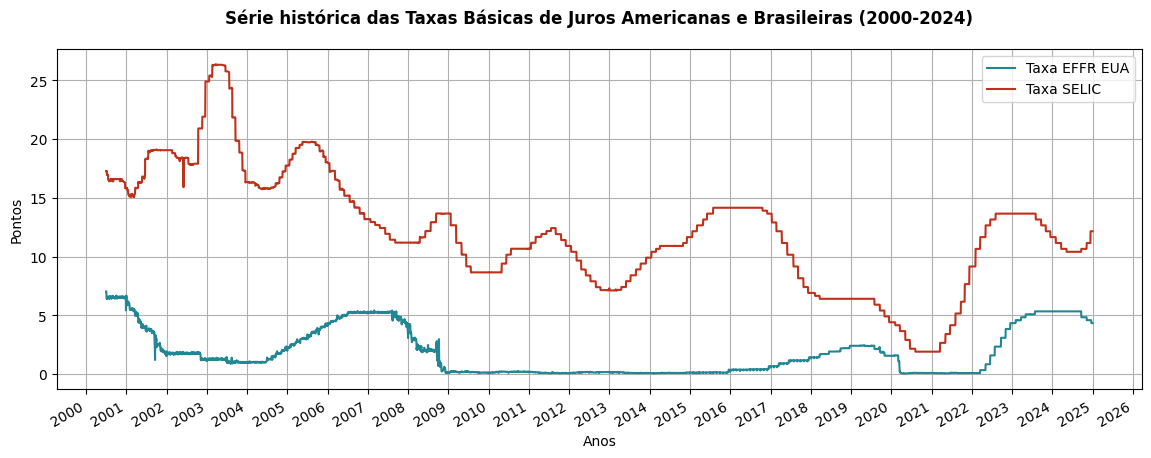

In [98]:
plt.figure(figsize=(14, 5))
plt.plot(dados2.index, dados2['EFFR'], label='Taxa EFFR EUA', color='#228794', linewidth=1.5)
plt.plot(dados2.index, dados2['SELIC'], label='Taxa SELIC', color='#bf311b', linewidth=1.5)

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica das Taxas Básicas de Juros Americanas e Brasileiras (2000-2024)', weight='bold', y=1.05)
plt.xlabel('Anos')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True)
plt.savefig('basic_rates_US_BR.png')
plt.show()

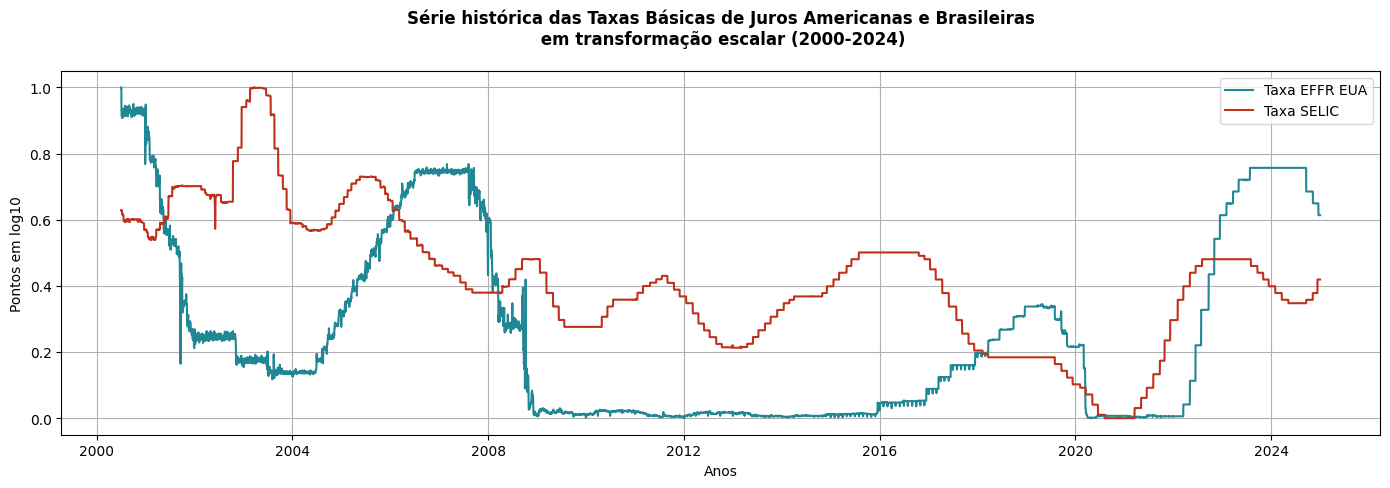

In [99]:
fig, ax  = plt.subplots(figsize=(14, 5))

plt.plot(dados2['scaled_EFFR'], label='Taxa EFFR EUA', color='#228794', linewidth=1.5)
# plt.plot(dados2.index, dados2['scaled_EFFR'], label='Taxa EFFR EUA', color='#228794', linewidth=1.5)
plt.plot(dados2.index, dados2['scaled_SELIC'], label='Taxa SELIC', color='#bf311b', linewidth=1.5)

ax.set(xlabel='Data', ylabel='Valores em log10')
ax.grid()

plt.xlabel('Anos', fontdict={'fontsize': 10})
plt.ylabel('Pontos em log10', fontdict={'fontsize': 10})
plt.title('Série histórica das Taxas Básicas de Juros Americanas e Brasileiras\n em transformação escalar (2000-2024)', weight='bold', y=1.05)
plt.legend()
plt.tight_layout()
plt.savefig('ajusted_basic_rates_US_BR.png')
plt.show()

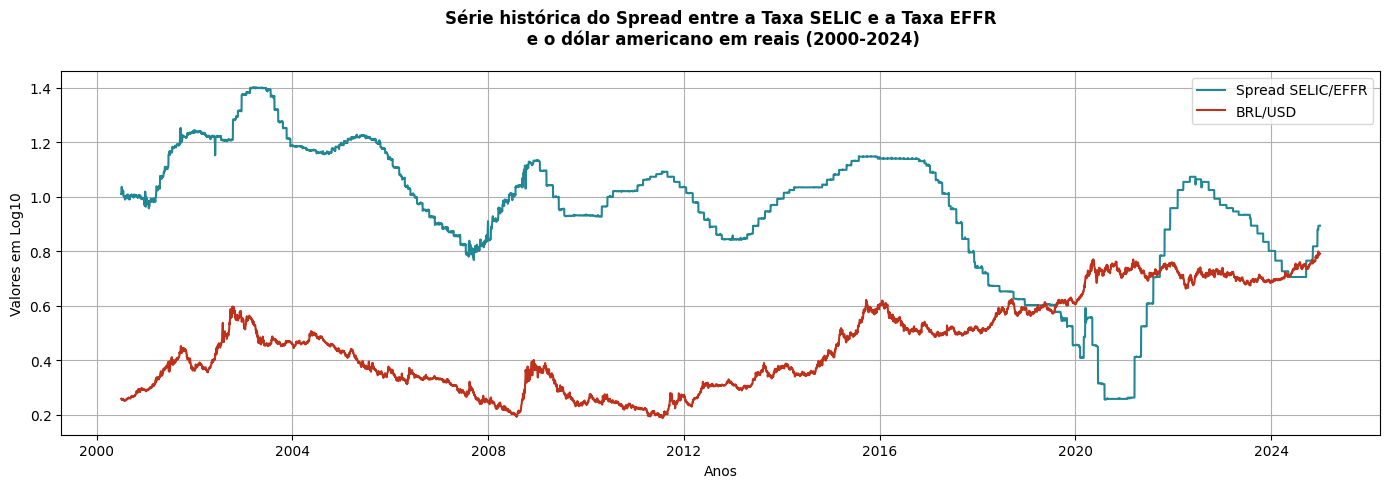

In [100]:
fig, ax  = plt.subplots(figsize=(14, 5))

# plt.plot(dados2['crude oil brent'], label='Petróleo Brent (U$/barril)', linewidth=1.5)
plt.plot(dados2.index, np.log10(dados2['SELIC-EFFR']), label='Spread SELIC/EFFR', color='#228794', linewidth=1.5)
plt.plot(dados2.index, np.log10(dados2['BRL/USD']), label='BRL/USD', color='#bf311b', linewidth=1.5)

# Annotate
# plt.annotate('Recorde de deflação mensal americana\napós falência do Lehman Brothers.\nNovembro de 2008',
#              xy=(df['crude oil brent'].idxmin(), np.min(df['crude oil brent'])),  # ponto do gráfico
#              xytext=(datetime.datetime(2012, 1, 1), -1.5),   # posição do texto
#              arrowprops=dict(arrowstyle="->"),
#              fontsize=8,
#              color='#696969')

# Linhas verticais
# plt.vlines(datetime.datetime(2008, 11, 1),-2.2,1.5,linewidth=1,linestyle='--',colors='#696969')

ax.set(xlabel='Data', ylabel='Valores em log10')
ax.grid()

plt.xlabel('Anos', fontdict={'fontsize': 10})
plt.ylabel('Valores em Log10', fontdict={'fontsize': 10})
plt.title('Série histórica do Spread entre a Taxa SELIC e a Taxa EFFR\n e o dólar americano em reais (2000-2024)', weight='bold', y=1.05)
plt.legend()
plt.tight_layout()
plt.savefig('log10_spread_BRL_USD.png')
plt.show()

In [101]:
regr = linear_model.LinearRegression()

In [102]:
X = np.log10(dados2['SELIC-EFFR'])
Y = np.log10(dados2['BRL/USD'])
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [103]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

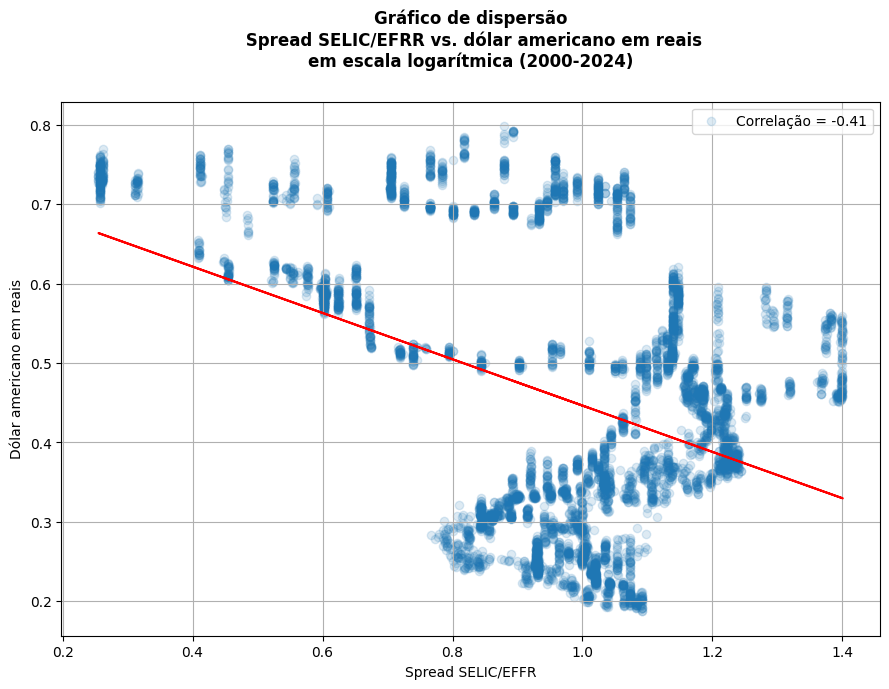

In [104]:
X = np.log10(dados2['SELIC-EFFR'])
Y = np.log10(dados2['BRL/USD'])
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.15, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Spread SELIC/EFFR')
plt.ylabel('Dólar americano em reais')
plt.title('Gráfico de dispersão\n Spread SELIC/EFRR vs. dólar americano em reais\nem escala logarítmica (2000-2024)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('spread_rates_BRL_USD.png')
plt.show()

In [105]:
X = dados['S&P500']
Y = dados['IBOV']
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [106]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

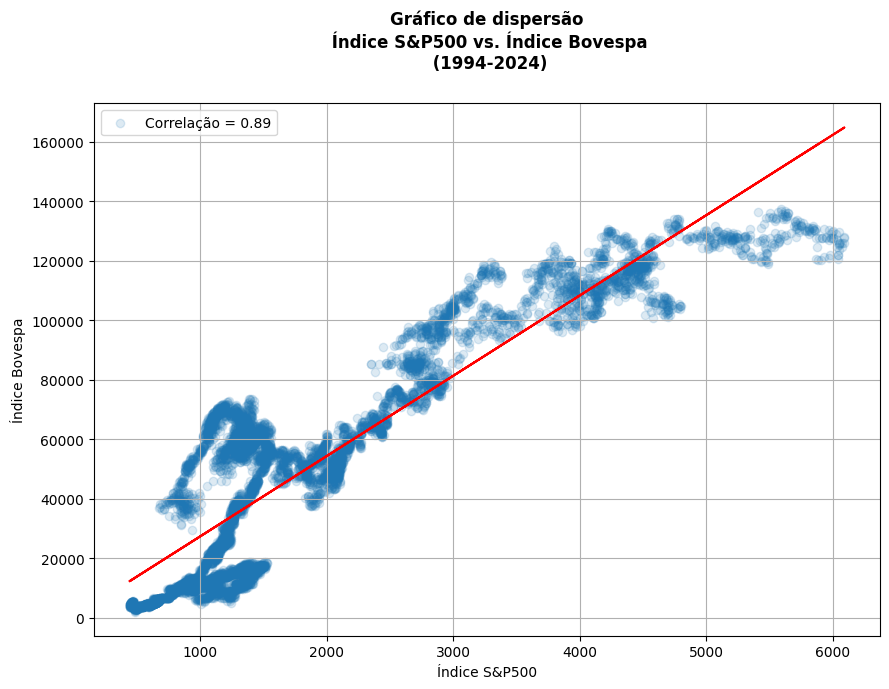

In [107]:
X = dados['S&P500']
Y = dados['IBOV']
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.15, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Índice S&P500')
plt.ylabel('Índice Bovespa')
plt.title('Gráfico de dispersão\n Índice S&P500 vs. Índice Bovespa\n (1994-2024)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('s&p500_vs_ibov.png')
plt.show()

In [108]:
dados2_filtrado = dados2.loc['2000-01-01':'2016-12-30']
dados2_filtrado

BRL/USD  EFFR  SELIC  scaled_EFFR  scaled_SELIC  SELIC-EFFR
Data                                                                   
2000-07-03   1.8130  7.03  17.26     1.000000      0.628221       10.23
2000-07-04   1.8080  7.03  17.22     1.000000      0.626585       10.19
2000-07-05   1.8020  6.52  17.23     0.927039      0.626994       10.71
2000-07-06   1.8000  6.51  17.28     0.925608      0.629039       10.77
2000-07-07   1.7990  6.42  17.28     0.912732      0.629039       10.86
...             ...   ...    ...          ...           ...         ...
2016-12-26   3.2760  0.66  13.65     0.088698      0.480573       12.99
2016-12-27   3.2697  0.66  13.65     0.088698      0.480573       12.99
2016-12-28   3.2840  0.66  13.65     0.088698      0.480573       12.99
2016-12-29   3.2532  0.66  13.65     0.088698      0.480573       12.99
2016-12-30   3.2532  0.55  13.65     0.072961      0.480573       13.10

[4303 rows x 6 columns]

In [109]:
X = np.log10(dados2_filtrado['SELIC-EFFR'])
Y = np.log10(dados2_filtrado['BRL/USD'])
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [110]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

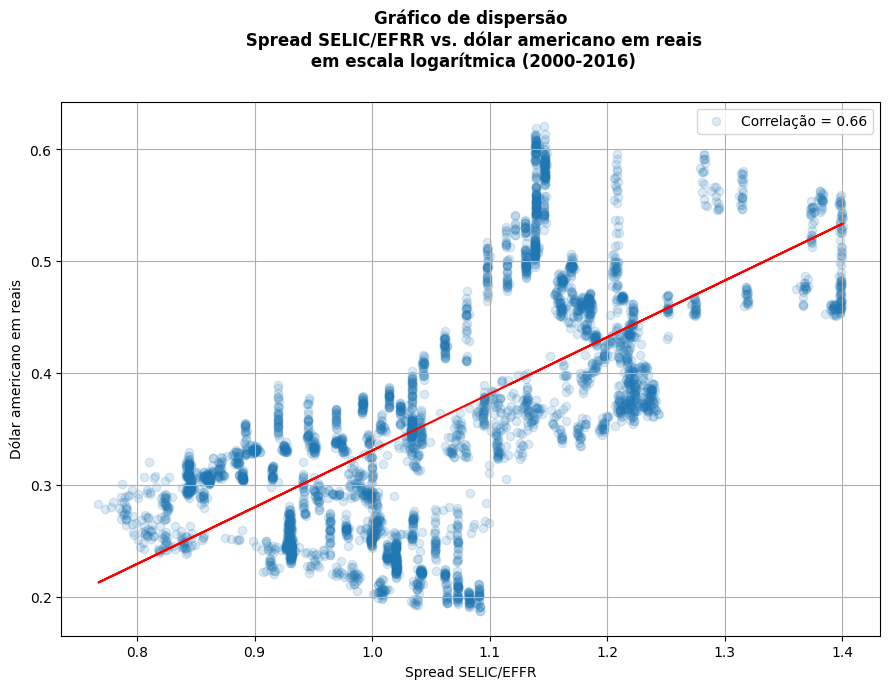

In [111]:
X = np.log10(dados2_filtrado['SELIC-EFFR'])
Y = np.log10(dados2_filtrado['BRL/USD'])
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.15, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Spread SELIC/EFFR')
plt.ylabel('Dólar americano em reais')
plt.title('Gráfico de dispersão\n Spread SELIC/EFRR vs. dólar americano em reais\n em escala logarítmica (2000-2016)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('spread_rates_BRL_USD_2000_2016.png')
plt.show()

In [112]:
dados2_filtrado2 = dados2.loc['2017-01-01':'2024-12-30']
dados2_filtrado2

BRL/USD  EFFR  SELIC  scaled_EFFR  scaled_SELIC  SELIC-EFFR
Data                                                                   
2017-01-02   3.2851  0.55  13.65     0.072961      0.480573       13.10
2017-01-03   3.2644  0.66  13.65     0.088698      0.480573       12.99
2017-01-04   3.2160  0.66  13.65     0.088698      0.480573       12.99
2017-01-05   3.1988  0.66  13.65     0.088698      0.480573       12.99
2017-01-06   3.2239  0.66  13.65     0.088698      0.480573       12.99
...             ...   ...    ...          ...           ...         ...
2024-12-24   6.1906  4.33  12.15     0.613734      0.419223        7.82
2024-12-25   6.1906  4.33  12.15     0.613734      0.419223        7.82
2024-12-26   6.1828  4.33  12.15     0.613734      0.419223        7.82
2024-12-27   6.1964  4.33  12.15     0.613734      0.419223        7.82
2024-12-30   6.1778  4.33  12.15     0.613734      0.419223        7.82

[2086 rows x 6 columns]

In [113]:
X = np.log10(dados2_filtrado2['SELIC-EFFR'])
Y = np.log10(dados2_filtrado2['BRL/USD'])
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [114]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

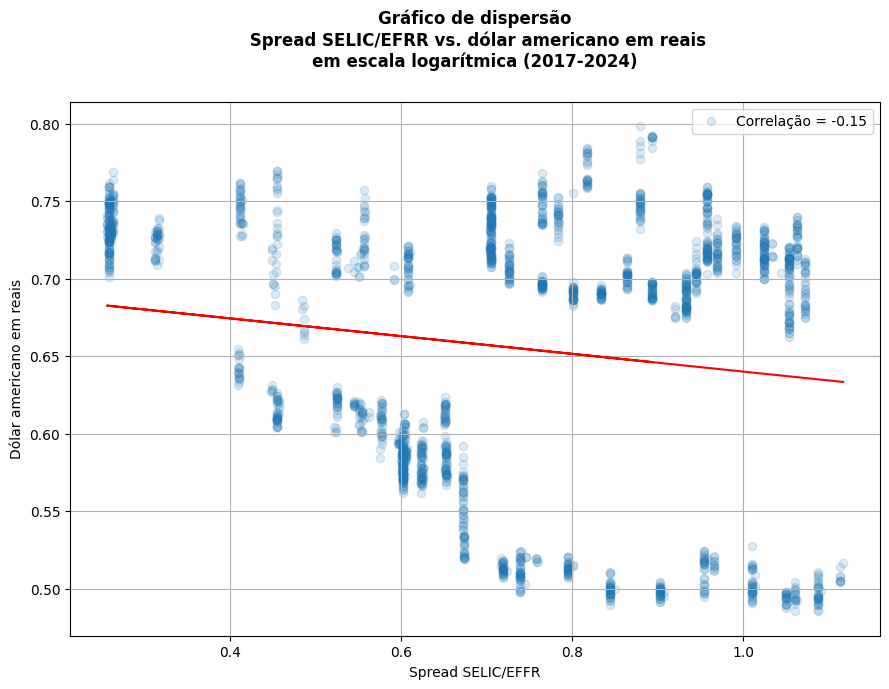

In [115]:
X = np.log10(dados2_filtrado2['SELIC-EFFR'])
Y = np.log10(dados2_filtrado2['BRL/USD'])
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.15, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Spread SELIC/EFFR')
plt.ylabel('Dólar americano em reais')
plt.title('Gráfico de dispersão\n Spread SELIC/EFRR vs. dólar americano em reais\nem escala logarítmica (2017-2024)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('spread_rates_BRL_USD_2017_2024.png')
plt.show()

In [116]:
dados3 = dados[['IPCA', 'CPI']].copy()
dados3

IPCA      CPI
Data                       
1994-07-01  148.40  148.400
1994-07-04  148.40  148.400
1994-07-05  148.40  148.400
1994-07-06  148.40  148.400
1994-07-07  148.40  148.400
...            ...      ...
2024-12-25  354.22  315.605
2024-12-26  354.22  315.605
2024-12-27  354.22  315.605
2024-12-30  354.22  315.605
2024-12-31  354.22  315.605

[7951 rows x 2 columns]

In [117]:
dados3['% IPCA'] = dados3['IPCA'].diff() / dados3['IPCA'].shift(1)
dados3['% CPI'] = dados3['CPI'].diff() / dados3['CPI'].shift(1)
dados3.loc[:, '% IPCA - CPI'] = dados3['% IPCA'] - dados3['% CPI']
dados3 = dados3[dados3['% IPCA - CPI'] != 0].dropna()
dados3

IPCA      CPI    % IPCA     % CPI  % IPCA - CPI
Data                                                         
1994-08-01  150.26  149.000  0.012534  0.004043      0.008491
1994-09-01  151.79  149.400  0.010182  0.002685      0.007498
1994-10-03  154.41  149.500  0.017261  0.000669      0.016591
1994-11-01  157.22  149.700  0.018198  0.001338      0.016861
1994-12-01  158.93  149.700  0.010876  0.000000      0.010876
...            ...      ...       ...       ...           ...
2024-08-01  352.31  314.796 -0.000057  0.000814     -0.000871
2024-09-02  352.75  315.301  0.001249  0.001604     -0.000355
2024-10-01  353.31  315.664  0.001588  0.001151      0.000436
2024-11-01  353.70  315.493  0.001104 -0.000542      0.001646
2024-12-02  354.22  315.605  0.001470  0.000355      0.001115

[365 rows x 5 columns]

In [118]:
dados4 = dados3.copy()
dados4['corrected_Crude'] = np.nan
dados4.loc[dados4.index[0], 'corrected_Crude'] = dados.loc[dados.index[0], 'Crude']

for i in range(1, len(dados4)):
    dados4.loc[dados4.index[i], 'corrected_Crude'] = dados4.loc[dados4.index[i - 1], 'corrected_Crude'] * (1 + dados4.loc[dados4.index[i - 1], '% CPI'])
dados4

IPCA      CPI    % IPCA     % CPI  % IPCA - CPI  corrected_Crude
Data                                                                          
1994-08-01  150.26  149.000  0.012534  0.004043      0.008491        17.570000
1994-09-01  151.79  149.400  0.010182  0.002685      0.007498        17.641038
1994-10-03  154.41  149.500  0.017261  0.000669      0.016591        17.688396
1994-11-01  157.22  149.700  0.018198  0.001338      0.016861        17.700236
1994-12-01  158.93  149.700  0.010876  0.000000      0.010876        17.723915
...            ...      ...       ...       ...           ...              ...
2024-08-01  352.31  314.796 -0.000057  0.000814     -0.000871        37.240349
2024-09-02  352.75  315.301  0.001249  0.001604     -0.000355        37.270658
2024-10-01  353.31  315.664  0.001588  0.001151      0.000436        37.330449
2024-11-01  353.70  315.493  0.001104 -0.000542      0.001646        37.373426
2024-12-02  354.22  315.605  0.001470  0.000355      0.001115        37.353181

[365 rows x 6 columns]

In [119]:
dados3['% CPI'].idxmin()

Timestamp('2008-11-03 00:00:00')

In [120]:
dados3.describe()

IPCA         CPI      % IPCA       % CPI  % IPCA - CPI
count  365.000000  365.000000  365.000000  365.000000    365.000000
mean   266.591205  217.304318    0.002390    0.002076      0.000314
std     54.052636   44.037218    0.002712    0.003541      0.004362
min    150.260000  149.000000   -0.002605   -0.019153     -0.011788
25%    218.610000  178.800000    0.000990    0.000000     -0.002393
50%    267.550000  216.741000    0.001758    0.001938     -0.000240
75%    315.580000  244.733000    0.002812    0.004254      0.002516
max    354.220000  315.664000    0.018198    0.013736      0.020519

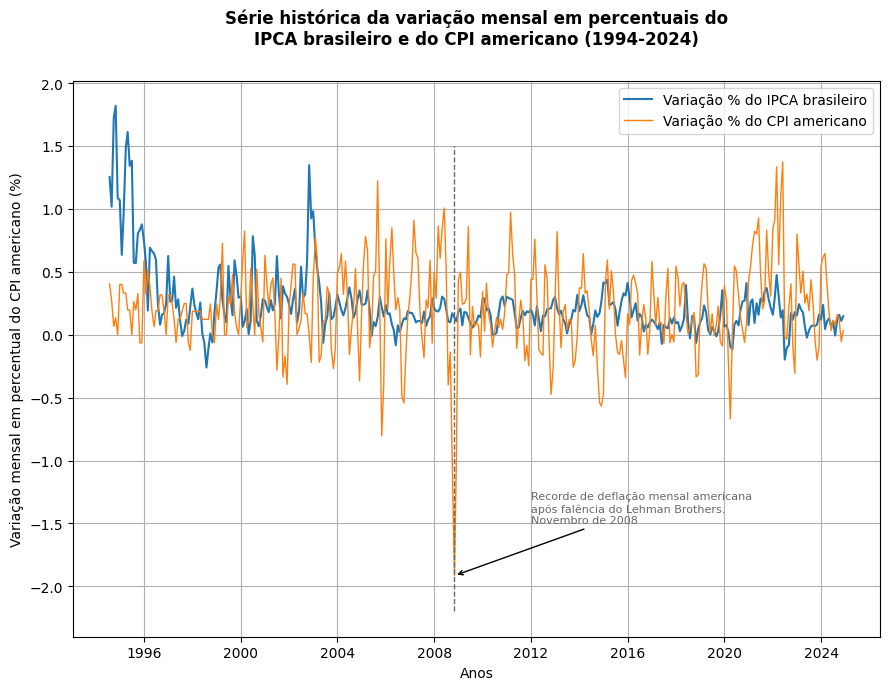

In [121]:
fig, ax  = plt.subplots()

plt.plot(dados3['% IPCA'] * 100, label='Variação % do IPCA brasileiro', linewidth=1.5)
plt.plot(dados3['% CPI'] * 100, label='Variação % do CPI americano', linewidth=1.0)

# Annotate
plt.annotate('Recorde de deflação mensal americana\napós falência do Lehman Brothers.\nNovembro de 2008',
             xy=(dados3['% CPI'].idxmin(), np.min(dados3['% CPI'] * 100)),  # ponto do gráfico
             xytext=(datetime.datetime(2012, 1, 1), -1.5),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=8,
             color='#696969')

# Linhas verticais
plt.vlines(datetime.datetime(2008, 11, 1),-2.2,1.5,linewidth=1,linestyle='--',colors='#696969')

ax.set(xlabel='Data', ylabel='Variação mensal em percentual (%))')
ax.grid()

plt.xlabel('Anos', fontdict={'fontsize': 10})
plt.ylabel('Variação mensal em percentual do CPI americano (%)', fontdict={'fontsize': 10})
plt.title('Série histórica da variação mensal em percentuais do\nIPCA brasileiro e do CPI americano (1994-2024)', weight='bold', y=1.05)
plt.legend()
plt.tight_layout()
plt.savefig('var%cpi_%ipca.png')
plt.show()

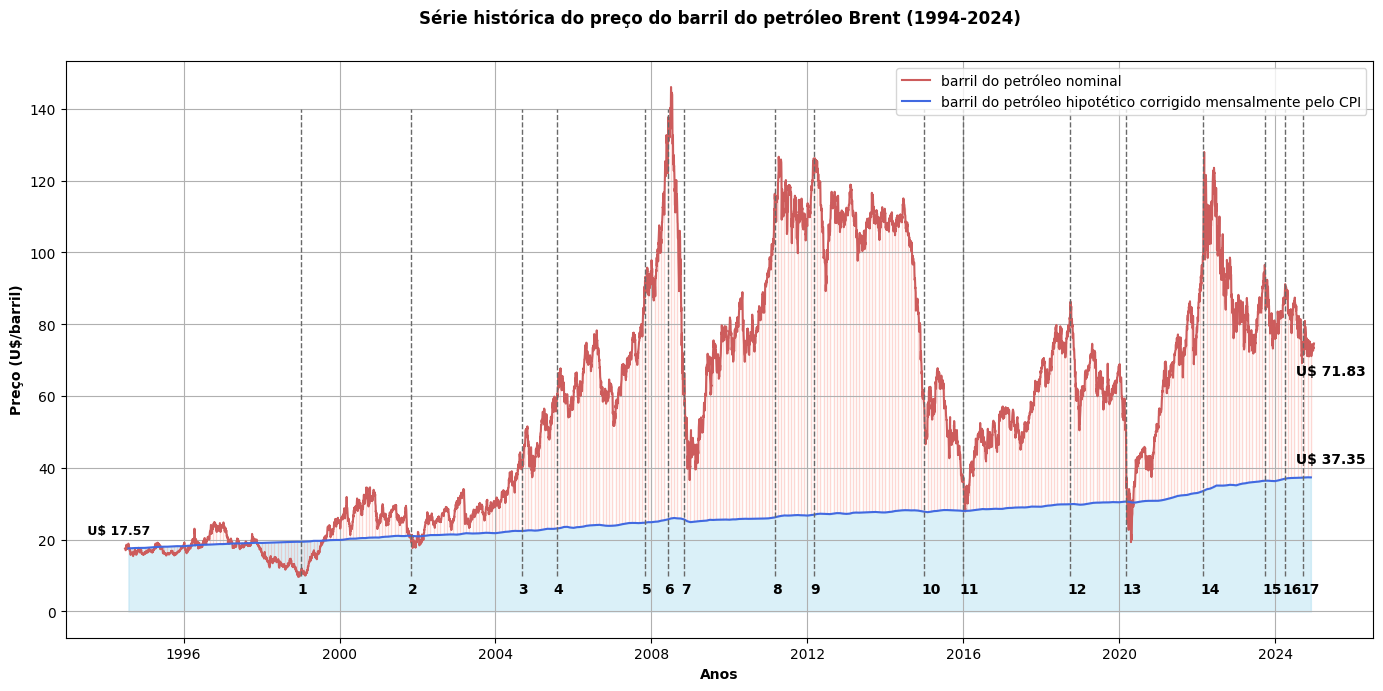

In [122]:
fig, ax  = plt.subplots(figsize=(14, 7))

plt.plot(dados.index, dados['Crude'], label='barril do petróleo nominal', color='#CD5C5C', linewidth=1.5)
plt.plot(dados4['corrected_Crude'], label='barril do petróleo hipotético corrigido mensalmente pelo CPI', color='#4169E1', linewidth=1.5)

data_especifica_1 = datetime.datetime(1994, 7, 1)
valor_especifico_1 = dados.loc[dados.index == data_especifica_1, 'Crude'].values[0]

data_especifica_2 = dados4.index[-1]
valor_especifico_2 = dados.loc[dados.index == data_especifica_2, 'Crude'].values[0]
valor_especifico_3 = dados4.loc[dados4.index == data_especifica_2, 'corrected_Crude'].values[0]

# Hachurar a área sob a curva do preço ajustado
plt.fill_between(dados4.index, dados4['corrected_Crude'], color='#87CEEB', alpha=0.3)

# Certificar-se de que as duas séries possuem os mesmos índices antes da comparação
# Reindexar dados4['corrected_Crude'] para parear com dados.index
corrected_crude_reindexed = dados4['corrected_Crude'].reindex(dados.index)

# Hachurar a área entre as duas linhas
plt.fill_between(dados.index, corrected_crude_reindexed, dados['Crude'],
                 where=(corrected_crude_reindexed > dados['Crude']),
                 color='#FA8072', alpha=0.3)

plt.fill_between(dados.index, corrected_crude_reindexed, dados['Crude'],
                 where=(corrected_crude_reindexed <= dados['Crude']),
                 color='#FA8072', alpha=0.3)

# Annotate
plt.annotate(f' U$ {valor_especifico_1:.2f}',
             xy=(data_especifica_1, valor_especifico_1),  # Coordenadas da anotação
             xytext=(datetime.datetime(1993, 6, 1), valor_especifico_1 + 4),  # Posição do texto
             fontsize=9, color='black', weight='bold')

plt.annotate(f' U$ {valor_especifico_2:.2f}',
             xy=(data_especifica_1, valor_especifico_2),  # Coordenadas da anotação
             xytext=(datetime.datetime(2024, 6, 1), valor_especifico_2 - 6),  # Posição do texto
             fontsize=10, color='black', weight='bold')

plt.annotate(f' U$ {valor_especifico_3:.2f}',
             xy=(data_especifica_2, valor_especifico_3),  # Coordenadas da anotação
             xytext=(datetime.datetime(2024, 6, 1), valor_especifico_3 + 4),  # Posição do texto
             fontsize=10, color='black', weight='bold')

events_dates = [datetime.datetime(1999, 1, 1), datetime.datetime(2001, 11, 1), datetime.datetime(2004, 9, 1),
                datetime.datetime(2005, 8, 1), datetime.datetime(2007, 11, 1), datetime.datetime(2008, 6, 1), datetime.datetime(2008, 11, 1),
                datetime.datetime(2011, 3, 1), datetime.datetime(2012, 3, 1), datetime.datetime(2015, 1, 1), datetime.datetime(2016, 1, 1),
                datetime.datetime(2018, 10, 1), datetime.datetime(2020, 3, 1), datetime.datetime(2022, 3, 1), datetime.datetime(2023, 10, 1),
                datetime.datetime(2024, 4, 6), datetime.datetime(2024, 9, 23)]

for i, date in enumerate(events_dates):
  # Linhas verticais
  plt.vlines(date,10,140,linewidth=1,linestyle='--',colors='#696969')

  # Calculate one month before the current date
  one_month_before = date.replace(day=1) - datetime.timedelta(days=1)
  one_month_before = one_month_before.replace(day=date.day)

  plt.annotate(f'{i + 1}',
            xy=(data_especifica_2, valor_especifico_2),  # Coordenadas da anotação
            xytext=(one_month_before, 5),  # Posição do texto
            fontsize=10, color='black', weight='bold')

# https://www.correiobraziliense.com.br/app/noticia/economia/2008/06/06/internas_economia,11381/entenda-como-o-petroleo-chegou-a-us-138-54.shtml
# https://g1.globo.com/mundo/noticia/2024/09/23/israel-lanca-maior-bombardeio-contra-o-hezbollah.ghtml
# https://pt.wikipedia.org/wiki/Guerra_Israel-Hamas

# Impasse entre os membros da OPEP quanto a necessidade de cortes na produção
# 11/09/2001 - Ataque ao World Trade Center em Nova Iorque
# Mercado preocupado com o abastecimento
# Furacão Katrina atinge o Golfo do México
# Ameaças de intervenção militar turca no Iraque e novas sanções dos EUA contra o Irã
# Temores sobre escassez de oferta e desvalorização do dólar
# Deflação recorde devido a quebra do Lehman Brothers
# Revolta no Egito e Primavera Árabe se alastra pelo Oriente Médio
# Embargo ao petróleo iraniano
# Desequilíbrio entre oferta e demanda global de petróleo
# Preocupações com a Economia Chinesa
# Redução da produção pelos países da OPEP
# Paralisação Econômica Global devido ao Covid-19
# Invasão da Ucrânia pela Rússia e início da Guerra Russo-Ucraniana
# Ataque terrorista pelo Hamas à Israel em 7/10/2023
# Ofensiva de Rafah pelo Exército de Israel próxima a fronteira com o Egito
# Bombardeio de Israel ao Hezbollah no Líbano


ax.set(xlabel='Data', ylabel='Preço (U$/barril)')
ax.grid()

plt.xlabel('Anos', fontdict={'fontsize': 10}, weight='bold')
plt.ylabel('Preço (U$/barril)', fontdict={'fontsize': 10}, weight='bold')
plt.title('Série histórica do preço do barril do petróleo Brent (1994-2024)', weight='bold', y=1.05)
plt.legend()
plt.tight_layout()
plt.savefig('hist_var_crude.png')
plt.show()

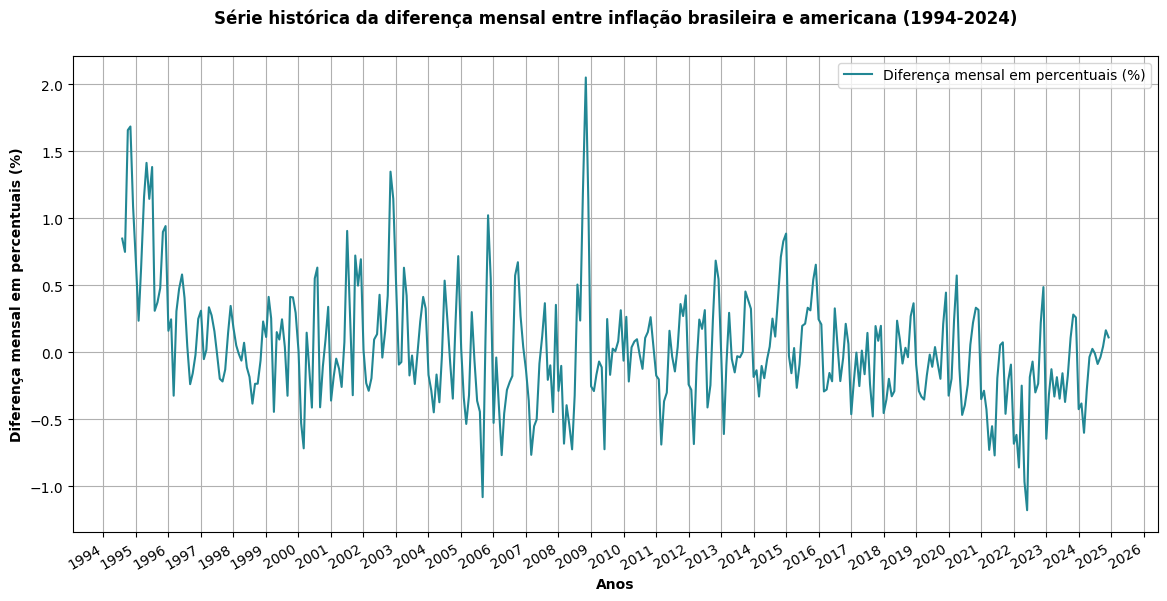

In [123]:
plt.figure(figsize=(14, 7))
plt.plot(dados3.index, dados3['% IPCA - CPI']*100, label='Diferença mensal em percentuais (%)', color='#228794')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica da diferença mensal entre inflação brasileira e americana (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos', weight='bold')
plt.ylabel('Diferença mensal em percentuais (%)', weight='bold')
plt.legend()
plt.grid(True)
plt.savefig('hist_diff_inflation.png')
plt.show()

In [124]:
dados3['% IPCA - CPI acumulativa'] = ((1 + dados3['% IPCA - CPI']).cumprod() - 1) * 100
dados3

IPCA      CPI    % IPCA     % CPI  % IPCA - CPI  \
Data                                                            
1994-08-01  150.26  149.000  0.012534  0.004043      0.008491   
1994-09-01  151.79  149.400  0.010182  0.002685      0.007498   
1994-10-03  154.41  149.500  0.017261  0.000669      0.016591   
1994-11-01  157.22  149.700  0.018198  0.001338      0.016861   
1994-12-01  158.93  149.700  0.010876  0.000000      0.010876   
...            ...      ...       ...       ...           ...   
2024-08-01  352.31  314.796 -0.000057  0.000814     -0.000871   
2024-09-02  352.75  315.301  0.001249  0.001604     -0.000355   
2024-10-01  353.31  315.664  0.001588  0.001151      0.000436   
2024-11-01  353.70  315.493  0.001104 -0.000542      0.001646   
2024-12-02  354.22  315.605  0.001470  0.000355      0.001115   

            % IPCA - CPI acumulativa  
Data                                  
1994-08-01                  0.849057  
1994-09-01                  1.605201  
1994-10-03                  3.290968  
1994-11-01                  5.032507  
1994-12-01                  6.174891  
...                              ...  
2024-08-01                 11.451922  
2024-09-02                 11.412321  
2024-10-01                 11.460924  
2024-11-01                 11.644340  
2024-12-02                 11.768843  

[365 rows x 6 columns]

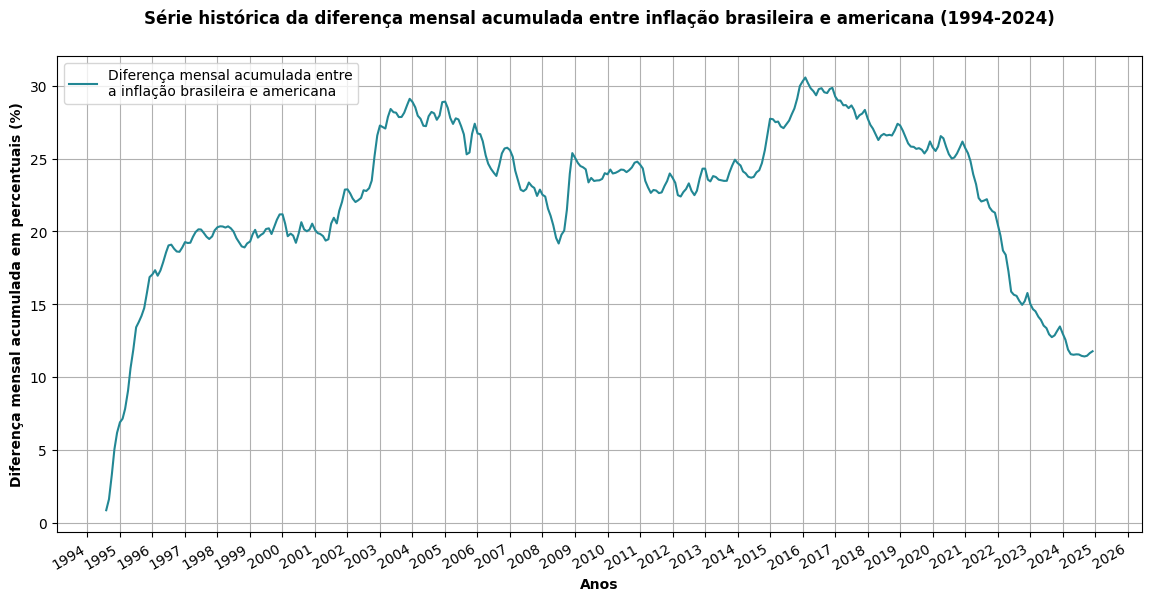

In [125]:
plt.figure(figsize=(14, 7))
plt.plot(dados3.index, dados3['% IPCA - CPI acumulativa'], label='Diferença mensal acumulada entre\na inflação brasileira e americana', color='#228794')

# Ajuste do eixo x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define a frequência dos ticks (ano a ano)
# plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Define ticks menores (mês a mês)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de data mais legível (Ano)

plt.gcf().autofmt_xdate()  # Rotaciona as labels das datas para evitar sobreposição

plt.title('Série histórica da diferença mensal acumulada entre inflação brasileira e americana (1994-2024)', weight='bold', y=1.05)
plt.xlabel('Anos', weight='bold')
plt.ylabel('Diferença mensal acumulada em percentuais (%)', weight='bold')
plt.legend()
plt.grid(True)
plt.savefig('hist_diff_acc_inflation.png')
plt.show()

In [126]:
X = dados3['CPI']
Y = dados3['IPCA']
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [127]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

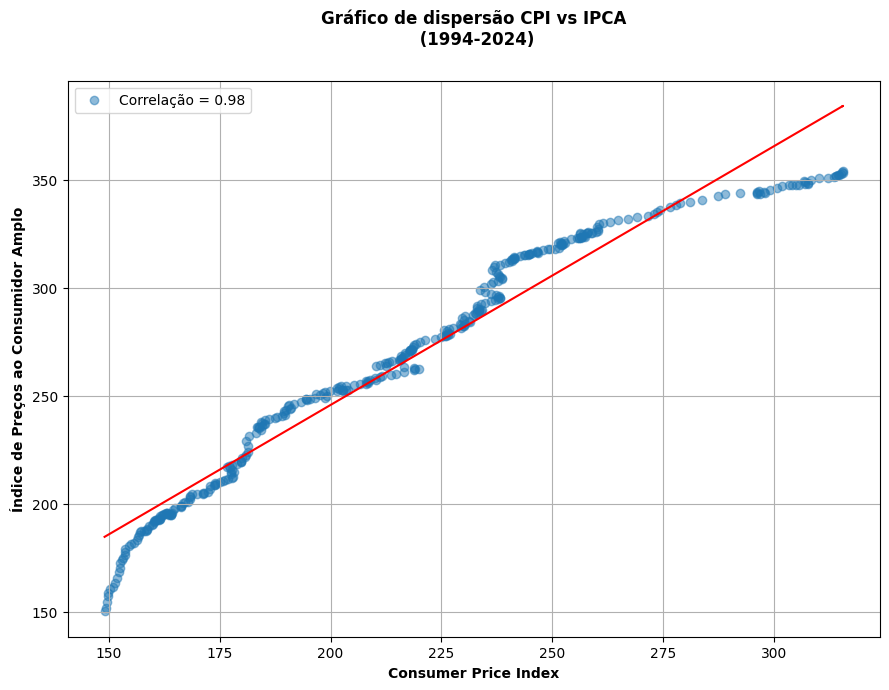

In [128]:
X = dados3['CPI']
Y = dados3['IPCA']
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.5, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Consumer Price Index', weight='bold')
plt.ylabel('Índice de Preços ao Consumidor Amplo', weight='bold')
plt.title('Gráfico de dispersão CPI vs IPCA\n (1994-2024)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('cpi_vs_ipca.png')
plt.show()

In [129]:
# Identify common columns
common_cols = list(set(dados.columns) & set(dados2.columns))
print("Common columns:", common_cols)

# Compare dados ranges for common columns
for col in common_cols:
    print(f"\nColumn: {col}")
    print(f"  dados range: ({dados[col].min()}, {dados[col].max()})")
    print(f"  dados2 range: ({dados2[col].min()}, {dados2[col].max()})")

# Analyze unique values in the 'dados' column
print("\nUnique values in 'dados' column (dados):")
print(dados.index.unique()[:5]) # Displaying first 5 for brevity
print("\nUnique values in 'dados2' column (dados2):")
print(dados2.index.unique()[:5]) # Displaying first 5 for brevity


# Document differences (create a summary table as a string)

differences_summary = """
Summary of Differences between dados and dados2:

| Feature        | dados1                   | dados2                      | Notes                                      |
|----------------|--------------------------|---------------------------|-------------------------------------------|
| Common Columns | Data, BRL/USD            | Data, BRL/USD             | Both datasets share 'Data' and 'BRL/USD'.   |
| Data Range     | BRL/USD (0.82, 6.29)     | BRL/USD (1.54, 6.29)      | Different ranges for BRL/USD.                |
| Unique Dates   | 07/01/1994 to ...        | 07/03/2000 to ...         | Significant difference in time periods covered |
| Other Columns  | S&P500, XAU/USD, Crude, CPI, IBOV, IPCA | EFFR, SELIC| Distinct sets of other features.            |
"""

print(differences_summary)

Common columns: ['BRL/USD']

Column: BRL/USD
  dados range: (0.823, 6.2896)
  dados2 range: (1.5378, 6.2896)

Unique values in 'dados' column (dados):
DatetimeIndex(['1994-07-01', '1994-07-04', '1994-07-05', '1994-07-06',
               '1994-07-07'],
              dtype='datetime64[ns]', name='Data', freq=None)

Unique values in 'dados2' column (dados2):
DatetimeIndex(['2000-07-03', '2000-07-04', '2000-07-05', '2000-07-06',
               '2000-07-07'],
              dtype='datetime64[ns]', name='Data', freq=None)

Summary of Differences between dados and dados2:

| Feature        | dados1                   | dados2                      | Notes                                      |
|----------------|--------------------------|---------------------------|-------------------------------------------|
| Common Columns | Data, BRL/USD            | Data, BRL/USD             | Both datasets share 'Data' and 'BRL/USD'.   |
| Data Range     | BRL/USD (0.82, 6.29)     | BRL/USD (1.54, 6.29)   

In [130]:
index1 = dados.loc['2000-07-03':'2024-12-31'].index
index2 = dados2.index

In [131]:
index1

DatetimeIndex(['2000-07-03', '2000-07-04', '2000-07-05', '2000-07-06',
               '2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14',
               ...
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Data', length=6390, freq=None)

In [132]:
index2

DatetimeIndex(['2000-07-03', '2000-07-04', '2000-07-05', '2000-07-06',
               '2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14',
               ...
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Data', length=6390, freq=None)

In [133]:
diff = index1.symmetric_difference(index2)
diff

DatetimeIndex([], dtype='datetime64[ns]', name='Data', freq=None)

In [134]:
dados_filtrado = dados.loc['2000-07-03':'2024-12-31']
dados_filtrado2 = dados_filtrado.copy()
dados_filtrado2.drop(columns=['dol_IBOV', 'scaled_S&P500', 'scaled_dol_IBOV', 'scaled_CPI', 'scaled_IPCA', 'MA50_S&P500', 'MA200_S&P500', 'MA50_IBOV', 'MA200_IBOV'], inplace=True)
dados_filtrado = dados_filtrado2
dados2 = dados2.drop(columns=['BRL/USD', 'scaled_EFFR', 'scaled_SELIC', 'SELIC', 'EFFR'])
dados_unificados = pd.concat([dados_filtrado, dados2], axis=1)
dados_unificados

BRL/USD   S&P500  XAU/USD  Crude      CPI    IBOV    IPCA  \
Data                                                                    
2000-07-03   1.8130  1469.50   287.90  31.10  172.800   16747  207.12   
2000-07-04   1.8080  1469.50   286.75  29.58  172.800   17106  207.12   
2000-07-05   1.8020  1446.20   284.15  29.38  172.800   17285  207.12   
2000-07-06   1.8000  1456.70   283.50  29.67  172.800   17148  207.12   
2000-07-07   1.7990  1478.90   283.65  29.70  172.800   17352  207.12   
...             ...      ...      ...    ...      ...     ...     ...   
2024-12-25   6.1906  6040.04  2613.20  73.58  315.605  122105  354.22   
2024-12-26   6.1828  6037.59  2634.43  73.26  315.605  120767  354.22   
2024-12-27   6.1964  5970.84  2620.00  74.17  315.605  121078  354.22   
2024-12-30   6.1778  5906.94  2605.39  74.39  315.605  120267  354.22   
2024-12-31   6.1778  5881.63  2623.81  74.64  315.605  120267  354.22   

            SELIC-EFFR  
Data                    
2000-07-03       10.23  
2000-07-04       10.19  
2000-07-05       10.71  
2000-07-06       10.77  
2000-07-07       10.86  
...                ...  
2024-12-25        7.82  
2024-12-26        7.82  
2024-12-27        7.82  
2024-12-30        7.82  
2024-12-31        7.82  

[6390 rows x 8 columns]

In [135]:
dados_unificados.dropna()
dados_unificados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BRL/USD     6390 non-null   float64
 1   S&P500      6390 non-null   float64
 2   XAU/USD     6390 non-null   float64
 3   Crude       6390 non-null   float64
 4   CPI         6390 non-null   float64
 5   IBOV        6390 non-null   int64  
 6   IPCA        6390 non-null   float64
 7   SELIC-EFFR  6390 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 449.3 KB


In [136]:
dados_unificados.describe()

BRL/USD       S&P500      XAU/USD        Crude          CPI  \
count  6390.000000  6390.000000  6390.000000  6390.000000  6390.000000   
mean      3.110756  2126.108518  1153.987618    67.834512   231.160169   
std       1.258148  1252.462964   583.590542    28.280405    37.541203   
min       1.537800   676.500000   255.550000    17.680000   172.800000   
25%       2.065250  1196.550000   622.625000    46.350000   202.416000   
50%       2.819500  1506.800000  1231.380000    66.550000   230.280000   
75%       3.880400  2775.600000  1613.150000    86.115000   252.146000   
max       6.289600  6090.270000  2786.190000   146.080000   315.664000   

                IBOV         IPCA   SELIC-EFFR  
count    6390.000000  6390.000000  6390.000000  
mean    61755.810016   285.702628    10.240349  
std     34238.885935    41.191080     4.732772  
min      8397.000000   207.120000     1.800000  
25%     37427.500000   252.650000     6.990000  
50%     57381.000000   284.710000    10.000000  
75%     85117.250000   321.000000    13.490000  
max    137349.000000   354.220000    25.150000

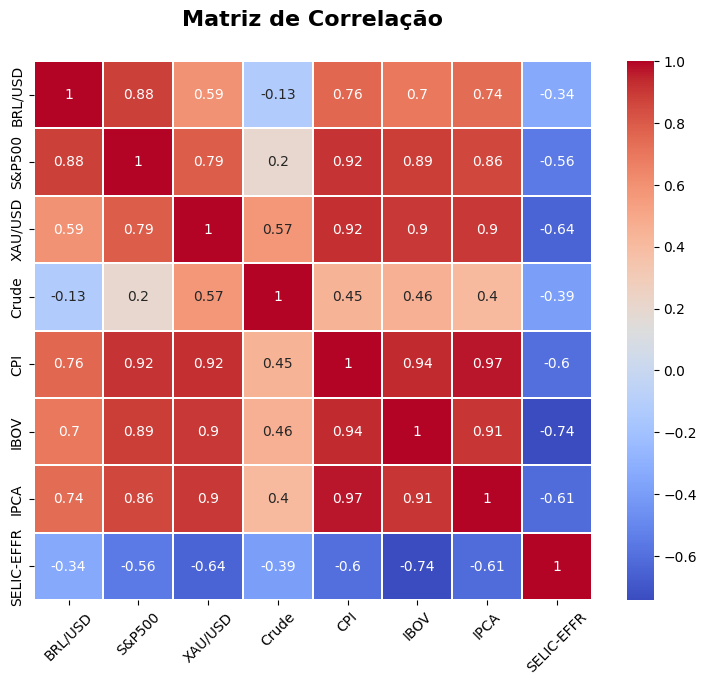

In [137]:
sns.heatmap(dados_unificados.corr(), annot=True, linewidths=0.1, linecolor='white', cmap='coolwarm')
plt.title('Matriz de Correlação', fontsize=16, weight='bold', y=1.05)
plt.xticks(rotation=45)
plt.savefig('unificados_corr_matrix.png')
plt.show()

In [138]:
X = dados_unificados['SELIC-EFFR']
Y = dados_unificados['IBOV']
regr.fit(np.array(X).reshape(-1, 1), Y)

LinearRegression()

In [139]:
Y_ajust = regr.predict(np.array(X).reshape(-1, 1))

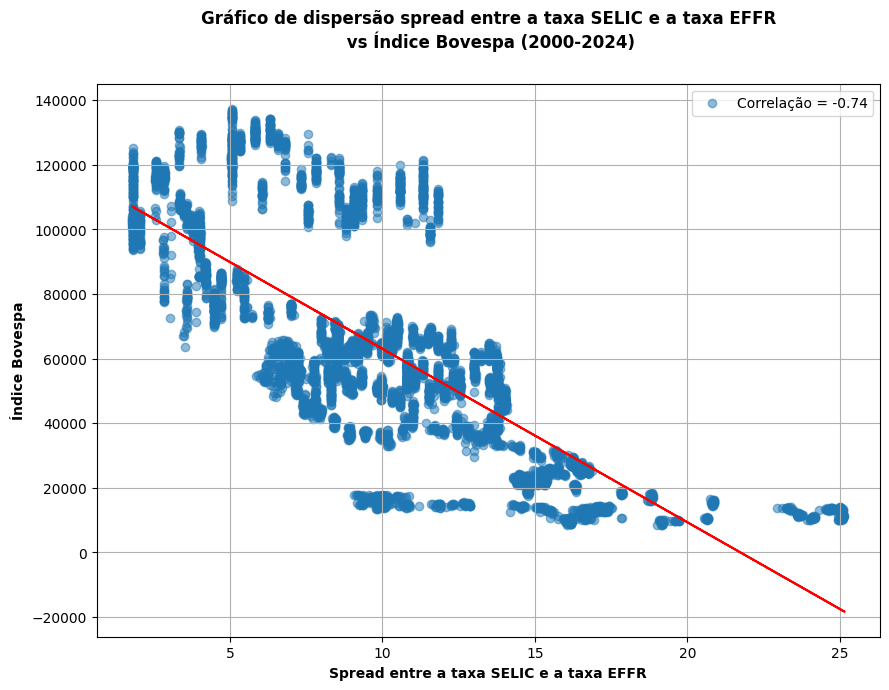

In [140]:
X = dados_unificados['SELIC-EFFR']
Y = dados_unificados['IBOV']
plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi':100})
plt.scatter(X,Y, alpha=0.5, label=f'Correlação = {np.round(np.corrcoef(X,Y)[0,1], 2)}')
plt.plot(X, Y_ajust, color='red')
plt.xlabel('Spread entre a taxa SELIC e a taxa EFFR', weight='bold')
plt.ylabel('Índice Bovespa', weight='bold')
plt.title('Gráfico de dispersão spread entre a taxa SELIC e a taxa EFFR\n vs Índice Bovespa (2000-2024)', weight='bold', y=1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('spread_rates_vs_ibov.png')
plt.show()